# Practical Statistics for data scientist
https://github.com/gedeck/practical-statistics-for-data-scientists/tree/master

# 1장 탐색적 데이터 분석

1장 탐색적 데이터 분석

6162876.3 4783697.125 4436369.5
4.445833981123393


(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

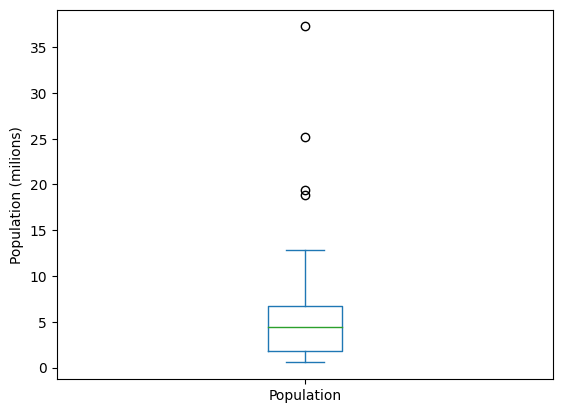

In [ ]:
import pandas as pd
from scipy.stats import trim_mean

# GitHub Raw 버전의 URL을 사용합니다.
url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/state.csv'

df = pd.read_csv(url)
df.head(10)

print(df['Population'].mean(),trim_mean(df['Population'],0.1),df['Population'].median())
# print(help(trim_mean))
# 절삭 평균은 뒤에 파라미터만끔 제거 하고 평균을 구함

import numpy as np

# 가중평균 & 가중메디안
print(np.average(df['Murder.Rate'],weights=df['Population']))
# 가중메디안은 잘 안쓰다보다
# import wquantiles
# print(wquantiles.median(df['Murder.Rate'],weights=df['Population']))

df['Population'].std()
df['Population'].quantile(0.75)-df['Population'].quantile(0.25)

from statsmodels import robust
robust.scale.mad(df['Population'])

# 중위 절대 편차(Median Absolute Deviation, MAD)는 데이터의 흩어진 정도를 나타내는 측도 중 하나입니다. 이는 데이터의 분산이나 표준 편차와 같은 통계량과 유사하지만, 이상치에 민감하지 않은 강건한(robust) 통계량입니다.
# MAD는 다음과 같이 계산됩니다:
# 데이터 포인트에서 중간값(또는 중앙값)을 계산합니다. 중간값은 데이터를 크기 순서대로 정렬했을 때 중앙에 위치한 값입니다.
# 각 데이터 포인트에서 중간값을 뺀 절대값을 계산합니다.
# 이렇게 계산된 절대값들의 중간값을 MAD로 사용합니다.


df['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95])
ax=(df['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (milions)')


Text(0.5, 0, 'Population (milions)')

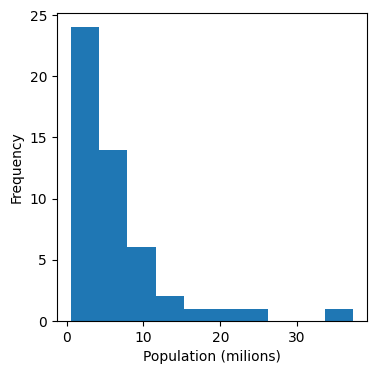

In [ ]:
#min, max 로 나눠서 10등분 하나봄
binnedPopluatlion=pd.cut(df['Population'],10)
binnedPopluatlion.value_counts()

ax1=(df['Population']/1_000_000).plot.hist(figsize=(4,4))
ax1.set_xlabel('Population (milions)')



Text(0.5, 0, 'Murder Rate (per 100,000)')

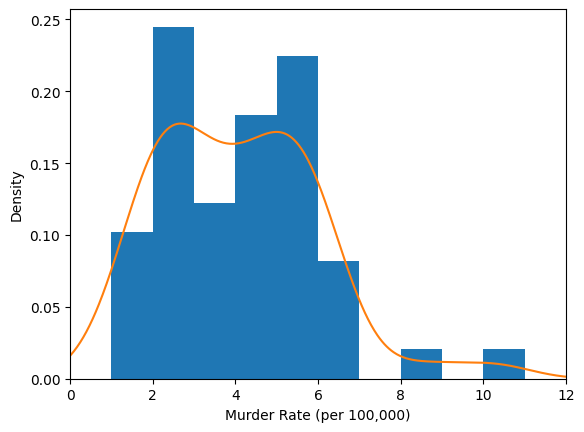

In [ ]:
ax=df['Murder.Rate'].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
df['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/airline_stats.csv'
dfw = pd.read_csv(url)
print(dfw)

       pct_carrier_delay  pct_atc_delay  pct_weather_delay    airline
0               8.153226       1.971774           0.762097   American
1               5.959924       3.706107           1.585878   American
2               7.157270       2.706231           2.026706   American
3              12.100000      11.033333           0.000000   American
4               7.333333       3.365591           1.774194   American
...                  ...            ...                ...        ...
33463           6.186422       8.798491           1.651940  Southwest
33464           9.522167       3.591133           0.261084  Southwest
33465           9.164179       2.664179           0.343284  Southwest
33466           5.152293       1.964520           0.122817  Southwest
33467           3.964393       1.700479           0.019449  Southwest

[33468 rows x 4 columns]


In [ ]:
dfw.columns

Index(['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay', 'airline'], dtype='object')

In [ ]:
df=dfw.T
df

,0,1,2,3,4,5,6,7,8,9,...,33458,33459,33460,33461,33462,33463,33464,33465,33466,33467
pct_carrier_delay,8.153226,5.959924,7.15727,12.1,7.333333,6.163889,7.744161,9.070175,10.406593,9.769784,...,6.950704,5.026423,8.566327,7.188889,9.246445,6.186422,9.522167,9.164179,5.152293,3.964393
pct_atc_delay,1.971774,3.706107,2.706231,11.033333,3.365591,3.225,10.642251,8.078947,8.164835,5.971223,...,1.570423,2.051829,2.022959,3.113889,1.938389,8.798491,3.591133,2.664179,1.96452,1.700479
pct_weather_delay,0.762097,1.585878,2.026706,0.0,1.774194,0.975,1.460722,0.72807,0.838828,0.71223,...,0.394366,0.052846,0.209184,0.0,0.0,1.65194,0.261084,0.343284,0.122817,0.019449
airline,American,American,American,American,American,American,American,American,American,American,...,Southwest,Southwest,Southwest,Southwest,Southwest,Southwest,Southwest,Southwest,Southwest,Southwest


In [ ]:
ax = df.plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

TypeError: ignored

In [ ]:
url='https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/blob/master/data/sp500_data.csv.gz'
df1=pd.read_csv('/content/sp500_data.csv.gz')
df1.head(5)

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [ ]:
correlation_matrix = df1.corr()

# 상관관계 행렬 출력
print(correlation_matrix)

<ipython-input-31-00af12740538>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


           ADS        CA      MSFT       RHT      CTSH       CSC       EMC  \
ADS   1.000000  0.123881  0.216321  0.138958  0.379913  0.160507  0.075650   
CA    0.123881  1.000000  0.332382  0.107467  0.168269  0.239873  0.245769   
MSFT  0.216321  0.332382  1.000000  0.196069  0.267655  0.271875  0.320603   
RHT   0.138958  0.107467  0.196069  1.000000  0.195811  0.117652  0.156827   
CTSH  0.379913  0.168269  0.267655  0.195811  1.000000  0.208166  0.133476   
...        ...       ...       ...       ...       ...       ...       ...   
CELG  0.314789  0.132268  0.228443  0.138532  0.334366  0.156807  0.113769   
GILD  0.303196  0.108358  0.195822  0.120633  0.269997  0.139537  0.076164   
REGN  0.285921  0.094310  0.146832  0.124301  0.236905  0.114592  0.093828   
VRTX  0.193290  0.185303  0.213308  0.112931  0.199582  0.179768  0.285517   
HSIC  0.310591  0.167769  0.279060  0.134313  0.356092  0.203116  0.099092   

           IBM       XRX      ALTR  ...       WAT      ALXN    

In [ ]:
url='https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/sp500_sectors.csv'
df=pd.read_csv(url)
df
# # Table 1-7
# # Determine telecommunications symbols
telecomSymbols = df[df['sector'] == 'telecommunications_services']['symbol']

In [ ]:
# 해당 코드는 나중에 다시 공부해야지
etfs = df1[df1.index > '2012-07-01',df1[df1['sector'] == 'etf']['symbol']]

TypeError: ignored

In [ ]:
url='https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/kc_tax.csv.gz'
kc_tax=pd.read_csv(url)
kc_tax.head(5)

kc_tax0=kc_tax.loc[(kc_tax.TaxAssessedValue<750000)&
                   (kc_tax.SqFtTotLiving>100)&
                   (kc_tax.SqFtTotLiving<3500)
                   ,:]
kc_tax0

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


Text(0, 0.5, 'tax-assesed value')

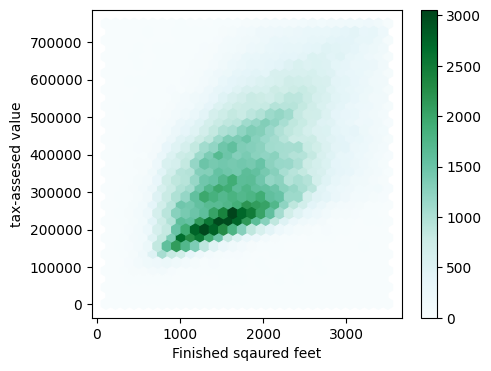

In [ ]:
ax=kc_tax0.plot.hexbin(x='SqFtTotLiving',y='TaxAssessedValue',gridsize=30,sharex=False,figsize=(5,4))
ax.set_xlabel('Finished sqaured feet')
ax.set_ylabel('tax-assesed value')


Text(0, 0.5, 'tax-assesed value')

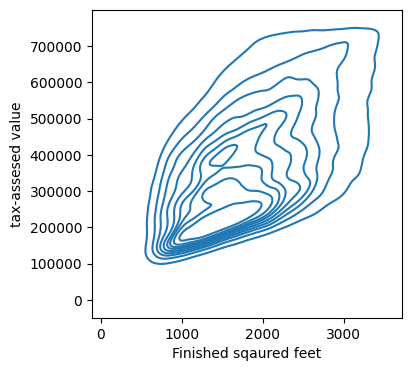

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(4,4))
ax=sns.kdeplot(data=kc_tax0,x='SqFtTotLiving',y="TaxAssessedValue",ax=ax)
ax.set_xlabel('Finished sqaured feet')
ax.set_ylabel('tax-assesed value')


In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/lc_loans.csv'
lc_loans=pd.read_csv(url)
lc_loans

crosstab = lc_loans.pivot_table(index='grade', columns='status',
                                aggfunc=lambda x: len(x), margins=True)
print(crosstab)

# aggfunc 매개변수는 pivot_table 함수에서 사용되며, 그룹별로 어떤 집계 함수를 사용할 것인지를 지정하는 데 사용됩니다. aggfunc은 기본적으로 각 그룹에 대한 집계 작업을 수행합니다.
# 여기서 aggfunc로 전달된 파라미터는 lambda x: len(x)입니다. 이것은 람다 함수로, 각 그룹에 대한 집계 함수로 사용됩니다. lambda x: len(x)는 그룹의 길이를 반환하는 함수입니다. 다시 말해, 각 그룹의 행의 수 또는 빈도를 계산하는 함수입니다.
# 따라서 코드에서는 'grade'와 'status' 열에 따라 그룹화된 각 그룹에 대한 길이(빈도)를 계산하고, 이 정보를 피벗 테이블에 포함합니다. 이렇게 하면 해당 등급(grade)과 대출 상태(status) 조합의 빈도가 피벗 테이블에 표시됩니다.
# margins=True는 마지막 행과 열에 합계 값을 추가하라는 옵션입니다. 따라서 피벗 테이블의 마지막 행과 열에는 각 열 및 행에 대한 합계가 포함됩니다. 이로써 전체 합계 및 부분 합계를 쉽게 확인할 수 있습니다.

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [ ]:
df = crosstab.copy().loc['A':'All',:]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
print(perc_crosstab)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.080373
B          0.040054  0.709013    0.235401  0.015532  0.146764
C          0.049828  0.735702    0.191495  0.022974  0.134019
D          0.067410  0.717328    0.184189  0.031073  0.082354
E          0.081657  0.707936    0.170929  0.039478  0.038589
F          0.118258  0.654371    0.180409  0.046962  0.014307
G          0.126196  0.614008    0.198396  0.061401  0.003593
All        0.050273  0.712223    0.215797  0.021707  0.500000


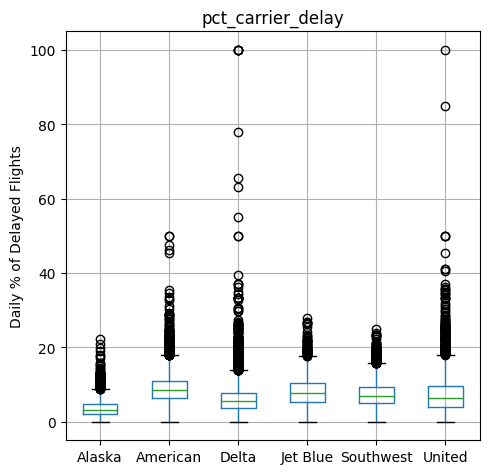

In [ ]:
import matplotlib.pyplot as plt
AIRLINE_STATS_CSV = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/airline_stats.csv'

airline_stats = pd.read_csv(AIRLINE_STATS_CSV)
airline_stats.head()
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

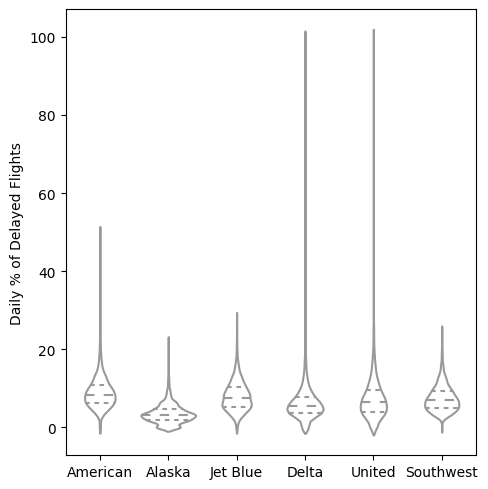

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

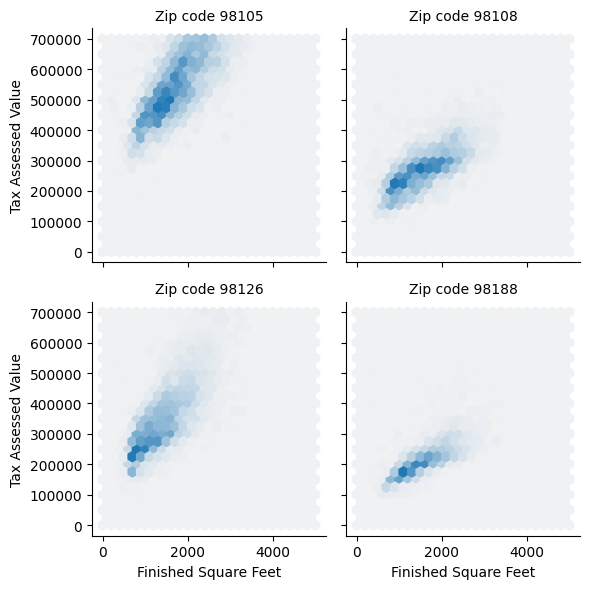

In [ ]:
import seaborn as sns
url='https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/kc_tax.csv.gz'
kc_tax=pd.read_csv(url)
kc_tax.head(5)

kc_tax0=kc_tax.loc[(kc_tax.TaxAssessedValue<750000)&
                   (kc_tax.SqFtTotLiving>100)&
                   (kc_tax.SqFtTotLiving<3500)
                   ,:]
kc_tax0


# 이거는 되게 어렵다
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue',
      extent=[0, 5000, 0, 700000])
# extent는 각 x축 시작 & 끝 y축 시작& 끝을 나타내는구나

g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()

# 2장 데이터와 분포

In [ ]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
LOANS_INCOME_CSV=pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv')
SP500_DATA_CSV=pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/sp500_data.csv.gz')

LOANS_INCOME_CSV
SP500_DATA_CSV

loans_income = LOANS_INCOME_CSV.squeeze('columns')

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())


         income  type
40292   63000.0  Data
38959   92000.0  Data
17361  134000.0  Data
33996   52000.0  Data
26491   43000.0  Data


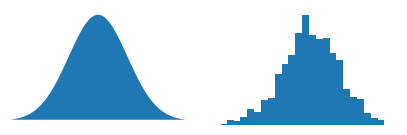

In [ ]:
np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2, figsize=(5, 1.5))

ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

plt.show()

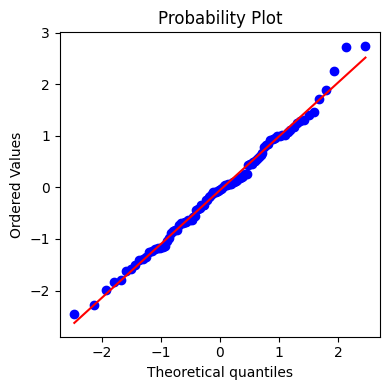

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

In [ ]:
print(stats.binom.pmf(2, n=5, p=0.1))
print(stats.binom.cdf(2, n=5, p=0.1))

0.07289999999999992
0.99144


# 3장 통계적실험과 유의성검정

In [ ]:
WEB_PAGE_DATA_CSV=pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/web_page_data.csv')
FOUR_SESSIONS_CSV=pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/four_sessions.csv')
CLICK_RATE_CSV=pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/click_rates.csv')
IMANISHI_CSV=pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/imanishi_data.csv')



      Page   Time
0   Page A   21.0
1   Page B  253.0
2   Page A   35.0
3   Page B   71.0
4   Page A   67.0
5   Page B   85.0
6   Page A  211.0
7   Page B  246.0
8   Page A  132.0
9   Page B  149.0
10  Page A   68.0
11  Page B   75.0
12  Page A  321.0
13  Page B  333.0
14  Page A  147.0
15  Page B  187.0
16  Page A   95.0
17  Page B  126.0
18  Page A   45.0
19  Page B   48.0
20  Page A  118.0
21  Page B  147.0
22  Page A  342.0
23  Page B  357.0
24  Page A  197.0
25  Page B  223.0
26  Page A   39.0
27  Page B   43.0
28  Page A   65.0
29  Page B   87.0
30  Page A  173.0
31  Page A   74.0
32  Page A   86.0
33  Page A  118.0
34  Page A  206.0
35  Page A   93.0


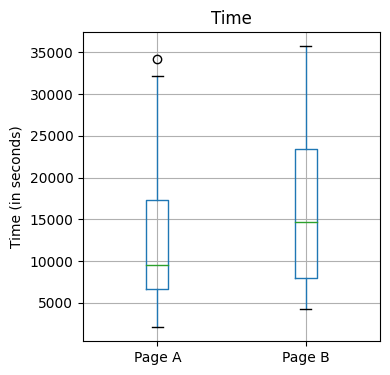

In [ ]:
session_times = WEB_PAGE_DATA_CSV
session_times.Time = 100 * session_times.Time
# print(session_times)

ax = session_times.boxplot(by='Page', column='Time',
                           figsize=(4, 4))
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

plt.tight_layout()
plt.show()

# 4장 회귀와 예측

In [ ]:
pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 35.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 16.3 MB/s eta 0:00:00


In [ ]:
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

from pygam import LinearGAM, s, l
from pygam.datasets import wage


import seaborn as sns
import matplotlib.pyplot as plt

from dmba import stepwise_selection
from dmba import AIC_score

Colab environment detected.


In [ ]:
%matplotlib inline

In [ ]:
# 데이터 로드
LUNG_CSV=pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/LungDisease.csv')
HOUSE_CSV=pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/house_sales.csv')



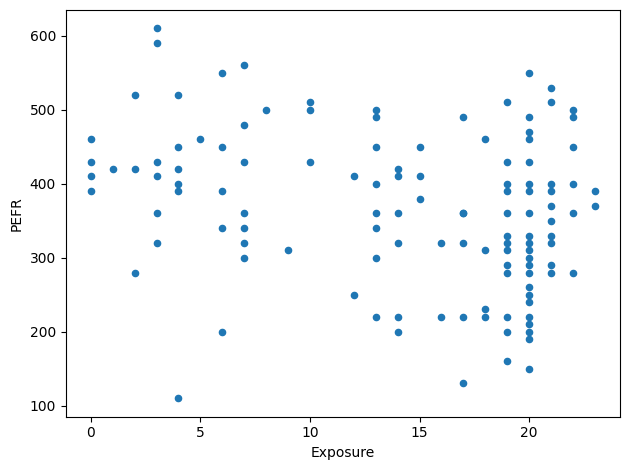

In [ ]:
# 단일 회귀분석
# 시각적 탐색
lung = LUNG_CSV

lung.plot.scatter(x='Exposure', y='PEFR')

plt.tight_layout()
plt.show()

In [ ]:
# 싸이킥런

from sklearn.linear_model import LinearRegression

predictors = ['Exposure']
outcome = 'PEFR'

model = LinearRegression()
model.fit(lung[predictors], lung[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

Intercept: 424.583
Coefficient Exposure: -4.185


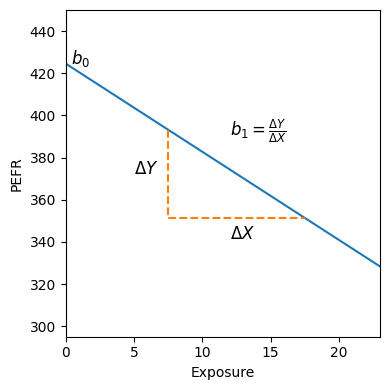

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

# 축 범위 설정
ax.set_xlim(0, 23)
ax.set_ylim(295, 450)

ax.set_xlabel('Exposure')
ax.set_ylabel('PEFR')

# 예측선 표기
ax.plot((0, 23), model.predict(pd.DataFrame({'Exposure': [0, 23]})))
ax.text(0.4, model.intercept_, r'$b_0$', size='larger')

x = pd.DataFrame({'Exposure': [7.5,17.5]})
y = model.predict(x)

# 설명 도식  텍스트
ax.plot((7.5, 7.5, 17.5), (y[0], y[1], y[1]), '--')
ax.text(5, np.mean(y), r'$\Delta Y$', size='larger')
ax.text(12, y[1] - 10, r'$\Delta X$', size='larger')
ax.text(12, 390, r'$b_1 = \frac{\Delta Y}{\Delta X}$', size='larger')

plt.tight_layout()
plt.show()

In [ ]:
# 적합값과 잔차

fitted = model.predict(lung[predictors])
residuals = lung[outcome] - fitted

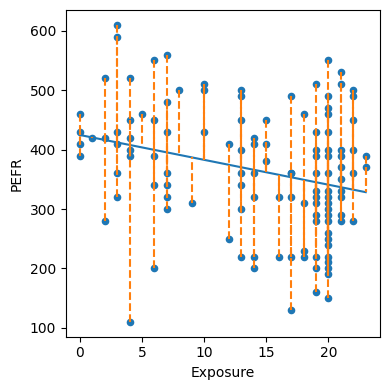

In [ ]:
ax = lung.plot.scatter(x='Exposure', y='PEFR', figsize=(4, 4))

# 잔차 시각화
ax.plot(lung.Exposure, fitted)

# zip 함수를 사용하여 반복가능한 객체를 반환
# lung 데이터프레임에 x, y, fitted를 가져옴
for x, yactual, yfitted in zip(lung.Exposure, lung.PEFR, fitted):
    ax.plot((x, x), (yactual, yfitted), '--', color='C1')

plt.tight_layout()
plt.show()

In [ ]:
# 다중회귀모델
subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms',
          'Bedrooms', 'BldgGrade']

# 데이터 로드

house=pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/house_sales.csv', sep='\t')
print(house[subset].head())


   AdjSalePrice  SqFtTotLiving  SqFtLot  Bathrooms  Bedrooms  BldgGrade
1      300805.0           2400     9373       3.00         6          7
2     1076162.0           3764    20156       3.75         4         10
3      761805.0           2060    26036       1.75         4          8
4      442065.0           3200     8618       3.75         5          7
5      297065.0           1720     8620       1.75         4          7


In [ ]:
# 변수와 예측값을 설정
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms',
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, house_lm.coef_):
    print(f' {name}: {coef}')

Intercept: -521871.368
Coefficients:
 SqFtTotLiving: 228.83060360240793
 SqFtLot: -0.06046682065307607
 Bathrooms: -19442.840398321066
 Bedrooms: -47769.95518521438
 BldgGrade: 106106.96307898081


In [ ]:
# 모델 평가

fitted = house_lm.predict(house[predictors])
RMSE = np.sqrt(mean_squared_error(house[outcome], fitted))
r2 = r2_score(house[outcome], fitted)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

RMSE: 261220
r2: 0.5406


In [ ]:
# 모델 평가 상세

model = sm.OLS(house[outcome], house[predictors].assign(const=1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:19:21   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8306      3.899     58.694

In [ ]:
# 모형선택 및 단계적 회귀
# 스텝와이즈... 되게 오랜만에 들어봄

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType', 'NbrLivingUnits',
              'SqFtFinBasement', 'YrBuilt', 'YrRenovated',
              'NewConstruction']
# print(house[predictors])

# 원핫인코딩으로 신나게 때림
X = pd.get_dummies(house[predictors], drop_first=True, dtype=int)

# boolean도 신나게 때림
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']]

house_full = sm.OLS(house[outcome], X.assign(const=1))
results = house_full.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2771.
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:26:50   Log-Likelihood:            -3.1375e+05
No. Observations:               22687   AIC:                         6.275e+05
Df Residuals:                   22674   BIC:                         6.276e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving       

In [ ]:
y = house[outcome]

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)

best_model, best_variables = stepwise_selection(X.columns, train_model, score_model,
                                                verbose=True)

print()
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade, NbrLivingUnits, SqFtFinBasement, YrBuilt, YrRenovated, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=647988.32, constant
Step: score=633013.35, add SqFtTotLiving
Step: score=630793.74, add BldgGrade
Step: score=628230.29, add YrBuilt
Step: score=627784.16, add Bedrooms
Step: score=627602.21, add Bathrooms
Step: score=627525.65, add PropertyType_Townhouse
Step: score=627525.08, add SqFtFinBasement
Step: score=627524.98, add PropertyType_Single Family
Step: score=627524.98, unchanged None

Intercept: 6178645.017
Coefficients:
 SqFtTotLiving: 199.2775530420188
 BldgGrade: 137159.56022619782
 YrBuilt: -3565.4249392492984
 Bedrooms: -51947.38367361323
 Bathrooms: 42396.16452771774
 PropertyType_Townhouse: 84479.16203300416
 SqFtFinBasement: 7.046974967553979
 PropertyType_Single Family: 22912.055187017646


In [ ]:
# 가중회귀
house['Year'] = [int(date.split('-')[0]) for date in house.DocumentDate]
house['Year'] = house.DocumentDate.apply(lambda d: int(d.split('-')[0]))
house['Weight'] = house.Year - 2005

In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms',
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_wt = LinearRegression()
house_wt.fit(house[predictors], house[outcome], sample_weight=house.Weight)

pd.concat([
    pd.DataFrame({
        'predictor': predictors,
        'house_lm': house_lm.coef_,
        'house_wt': house_wt.coef_,
    }),
    pd.DataFrame({
        'predictor': ['intercept'],
        'house_lm': house_lm.intercept_,
        'house_wt': house_wt.intercept_,
    })
])

,predictor,house_lm,house_wt
0,SqFtTotLiving,228.830604,245.024089
1,SqFtLot,-0.060467,-0.292415
2,Bathrooms,-19442.840398,-26085.970109
3,Bedrooms,-47769.955185,-53608.876436
4,BldgGrade,106106.963079,115242.434726
0,intercept,-521871.368188,-584189.329446


In [ ]:
residuals = pd.DataFrame({
    'abs_residual_lm': np.abs(house_lm.predict(house[predictors]) - house[outcome]),
    'abs_residual_wt': np.abs(house_wt.predict(house[predictors]) - house[outcome]),
    'Year': house['Year'],
})
print(residuals.head())
# axes = residuals.boxplot(['abs_residual_lm', 'abs_residual_wt'], by='Year', figsize=(10, 4))
# axes[0].set_ylim(0, 300000)

pd.DataFrame(([year, np.mean(group['abs_residual_lm']), np.mean(group['abs_residual_wt'])]
              for year, group in residuals.groupby('Year')),
             columns=['Year', 'mean abs_residual_lm', 'mean abs_residual_wt'])
# for year, group in residuals.groupby('Year'):
#     print(year, np.mean(group['abs_residual_lm']), np.mean(group['abs_residual_wt']))

   abs_residual_lm  abs_residual_wt  Year
1    123750.814194    107108.553965  2014
2     59145.413089     96191.882094  2006
3    190108.725716    187004.492880  2007
4    198788.774412    196132.996857  2008
5     91774.996129     84277.577512  2013


,Year,mean abs_residual_lm,mean abs_residual_wt
0,2006,140540.303585,146557.454636
1,2007,147747.577959,152848.523235
2,2008,142086.905943,146360.411668
3,2009,147016.720883,151182.924825
4,2010,163267.674885,166364.476152
5,2011,169937.385744,172950.876028
6,2012,169506.670053,171874.424266
7,2013,203659.777510,206242.199403
8,2014,184452.840665,186668.573750
9,2015,172323.435147,169842.742053


In [ ]:
# 가변수 표현
print(house.PropertyType.head())

1        Multiplex
2    Single Family
3    Single Family
4    Single Family
5    Single Family
Name: PropertyType, dtype: object


In [ ]:
# 원핫인코딩
print(pd.get_dummies(house['PropertyType']).head(6))

   Multiplex  Single Family  Townhouse
1          1              0          0
2          0              1          0
3          0              1          0
4          0              1          0
5          0              1          0
6          0              0          1


In [ ]:
print(pd.get_dummies(house['PropertyType'], drop_first=True).head(6))

   Single Family  Townhouse
1              0          0
2              1          0
3              1          0
4              1          0
5              1          0
6              0          1


In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType']

X = pd.get_dummies(house[predictors], drop_first=True)

house_lm_factor = LinearRegression()
house_lm_factor.fit(X, house[outcome])

print(f'Intercept: {house_lm_factor.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, house_lm_factor.coef_):
    print(f' {name}: {coef}')

Intercept: -446841.366
Coefficients:
 SqFtTotLiving: 223.37362892503828
 SqFtLot: -0.07036798136813083
 Bathrooms: -15979.013473415205
 Bedrooms: -50889.73218483025
 BldgGrade: 109416.30516146179
 PropertyType_Single Family: -84678.21629549257
 PropertyType_Townhouse: -115121.97921609184


In [ ]:
# 다수 수준의 요인을 갖춘 요인 변수들

print(pd.DataFrame(house['ZipCode'].value_counts()).transpose())

         98038  98103  98042  98115  98117  98052  98034  98033  98059  98074  \
ZipCode    788    671    641    620    619    614    575    517    513    502   

         ...  98051  98024  98354  98050  98057  98288  98224  98068  98113  \
ZipCode  ...     32     31      9      7      4      4      3      1      1   

         98043  
ZipCode      1  

[1 rows x 80 columns]


In [ ]:
# 80개의 변수를 5개로 나눔

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms',
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])


# zip 코드별로 그룹의 중앙 잔차값으로 정렬
zip_groups = pd.DataFrame([
    *pd.DataFrame({
        'ZipCode': house['ZipCode'],
        'residual' : house[outcome] - house_lm.predict(house[predictors]),
    })
    .groupby(['ZipCode'])
    .apply(lambda x: {
        'ZipCode': x.iloc[0,0],
        'count': len(x),
        'median_residual': x.residual.median()
    })
]).sort_values('median_residual')
# print(zip_groups)

# Zipcode를 그룹핑함
zip_groups['cum_count'] = np.cumsum(zip_groups['count'])
zip_groups['ZipGroup'] = pd.qcut(zip_groups['cum_count'], 4, labels=False, retbins=False)
zip_groups.head()

print(zip_groups.ZipGroup.value_counts().sort_index())
print(zip_groups)

0    20
1    20
2    20
3    20
Name: ZipGroup, dtype: int64
    ZipCode  count  median_residual  cum_count  ZipGroup
36    98057      4   -537321.644462          4         0
27    98043      1   -307661.343614          5         0
46    98092    289   -193569.183599        294         0
23    98038    788   -150066.477035       1082         0
31    98051     32   -142352.869593       1114         0
..      ...    ...              ...        ...       ...
60    98119    260    174462.549290      21746         3
54    98112    357    232788.487256      22103         3
25    98040    244    254004.002463      22347         3
3     98004    293    383596.028729      22640         3
24    98039     47    740960.478872      22687         3

[80 rows x 5 columns]


In [ ]:
to_join = zip_groups[['ZipCode', 'ZipGroup']].set_index('ZipCode')
house = house.join(to_join, on='ZipCode')
house['ZipGroup'] = house['ZipGroup'].astype('category')

In [ ]:
# 회귀방정식 해석

print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Intercept: 6178645.017
Coefficients:
 SqFtTotLiving: 199.2775530420188
 BldgGrade: 137159.56022619782
 YrBuilt: -3565.4249392492984
 Bedrooms: -51947.38367361323
 Bathrooms: 42396.16452771774
 PropertyType_Townhouse: 84479.16203300416
 SqFtFinBasement: 7.046974967553979
 PropertyType_Single Family: 22912.055187017646


In [ ]:
predictors = ['Bedrooms', 'BldgGrade', 'PropertyType', 'YrBuilt']
outcome = 'AdjSalePrice'

X = pd.get_dummies(house[predictors], drop_first=True)

reduced_lm = LinearRegression()
reduced_lm.fit(X, house[outcome])


print(f'Intercept: {reduced_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, reduced_lm.coef_):
    print(f' {name}: {coef}')

Intercept: 4913973.344
Coefficients:
 Bedrooms: 27150.537230215377
 BldgGrade: 248997.79366213758
 YrBuilt: -3211.7448621550866
 PropertyType_Single Family: -19898.495340502435
 PropertyType_Townhouse: -47355.4368733449


In [ ]:
# 교란변수

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType', 'ZipGroup']
outcome = 'AdjSalePrice'

X = pd.get_dummies(house[predictors], drop_first=True)

confounding_lm = LinearRegression()
confounding_lm.fit(X, house[outcome])

print(f'Intercept: {confounding_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, confounding_lm.coef_):
    print(f' {name}: {coef}')

Intercept: -666637.469
Coefficients:
 SqFtTotLiving: 210.61266005580157
 SqFtLot: 0.4549871385465867
 Bathrooms: 5928.425640001528
 Bedrooms: -41682.87184074474
 BldgGrade: 98541.18352725972
 PropertyType_Single Family: 19323.625287919327
 PropertyType_Townhouse: -78198.72092762386
 ZipGroup_1: 53317.17330659817
 ZipGroup_2: 116251.58883563544
 ZipGroup_3: 178360.53178793355
 ZipGroup_4: 338408.60185652005


In [ ]:
# 상호작용과 주효과
model = smf.ols(formula='AdjSalePrice ~  SqFtTotLiving*ZipGroup + SqFtLot + ' +
     'Bathrooms + Bedrooms + BldgGrade + PropertyType', data=house)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     3247.
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:05:17   Log-Likelihood:            -3.1098e+05
No. Observations:               22687   AIC:                         6.220e+05
Df Residuals:                   22671   BIC:                         6.221e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [ ]:
# 특잇갑 설정

house_98105 = house.loc[house['ZipCode'] == 98105, ]

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade']
outcome = 'AdjSalePrice'

house_outlier = sm.OLS(house_98105[outcome], house_98105[predictors].assign(const=1))
result_98105 = house_outlier.fit()
print(result_98105.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     238.7
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          1.69e-103
Time:                        14:09:41   Log-Likelihood:                -4226.0
No. Observations:                 313   AIC:                             8464.
Df Residuals:                     307   BIC:                             8486.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   209.6023     24.408      8.587

In [ ]:
influence = OLSInfluence(result_98105)
sresiduals = influence.resid_studentized_internal

print(sresiduals.idxmin(), sresiduals.min())

24333 -4.32673180407856


In [ ]:
print(result_98105.resid.loc[sresiduals.idxmin()])

-757753.6192115822


In [ ]:
outlier = house_98105.loc[sresiduals.idxmin(), :]
print('AdjSalePrice', outlier[outcome])
print(outlier[predictors])

AdjSalePrice 119748.0
SqFtTotLiving    2900
SqFtLot          7276
Bathrooms         3.0
Bedrooms            6
BldgGrade           7
Name: 24333, dtype: object


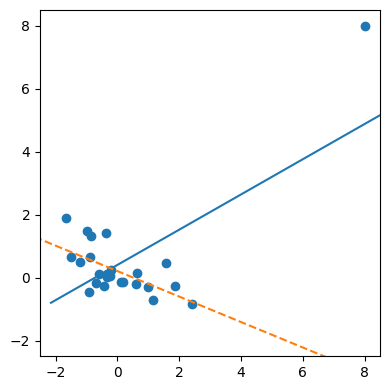

In [ ]:
# 영향값
%matplotlib inline
from scipy.stats import linregress

np.random.seed(5)
x = np.random.normal(size=25)
y = -x / 5 + np.random.normal(size=25)
x[0] = 8
y[0] = 8

def abline(slope, intercept, ax):
    """Calculate coordinates of a line based on slope and intercept"""
    x_vals = np.array(ax.get_xlim())
    return (x_vals, intercept + slope * x_vals)

fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(x, y)
slope, intercept, _, _, _ = linregress(x, y)
ax.plot(*abline(slope, intercept, ax))
slope, intercept, _, _, _ = linregress(x[1:], y[1:])
ax.plot(*abline(slope, intercept, ax), '--')
ax.set_xlim(-2.5, 8.5)
ax.set_ylim(-2.5, 8.5)

plt.tight_layout()
plt.show()

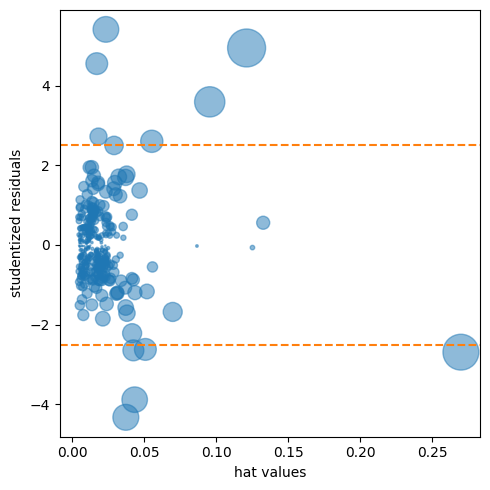

In [ ]:
influence = OLSInfluence(result_98105)
fig, ax = plt.subplots(figsize=(5, 5))
ax.axhline(-2.5, linestyle='--', color='C1')
ax.axhline(2.5, linestyle='--', color='C1')
ax.scatter(influence.hat_matrix_diag, influence.resid_studentized_internal,
           s=1000 * np.sqrt(influence.cooks_distance[0]),
           alpha=0.5)

ax.set_xlabel('hat values')
ax.set_ylabel('studentized residuals')

plt.tight_layout()
plt.show()

In [ ]:
mask = [dist < .08 for dist in influence.cooks_distance[0]]
house_infl = house_98105.loc[mask]

ols_infl = sm.OLS(house_infl[outcome], house_infl[predictors].assign(const=1))
result_infl = ols_infl.fit()

pd.DataFrame({
    'Original': result_98105.params,
    'Influential removed': result_infl.params,
})

,Original,Influential removed
SqFtTotLiving,209.602346,230.052569
SqFtLot,38.933315,33.141600
Bathrooms,2282.264145,-16131.879785
Bedrooms,-26320.268796,-22887.865318
BldgGrade,130000.099737,114870.559737
const,-772549.862447,-647137.096716


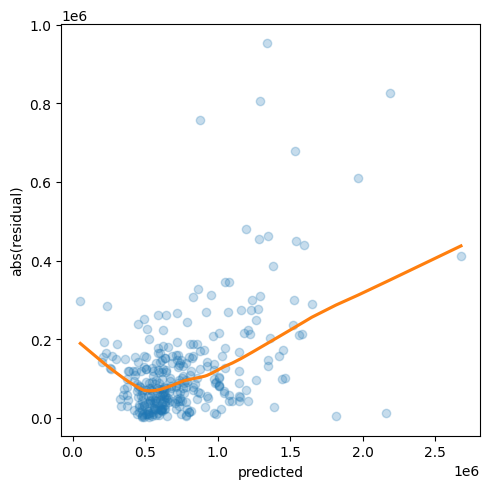

In [ ]:
# 이분산성, 비정규성, 오차 간 상관

fig, ax = plt.subplots(figsize=(5, 5))
sns.regplot(x=result_98105.fittedvalues, y=np.abs(result_98105.resid),
            scatter_kws={'alpha': 0.25},
            line_kws={'color': 'C1'},
            lowess=True, ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('abs(residual)')

plt.tight_layout()
plt.show()

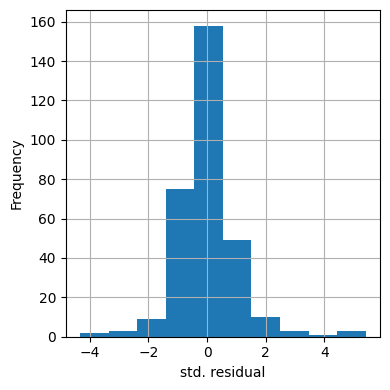

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
pd.Series(influence.resid_studentized_internal).hist(ax=ax)
ax.set_xlabel('std. residual')
ax.set_ylabel('Frequency')


plt.tight_layout()
plt.show()

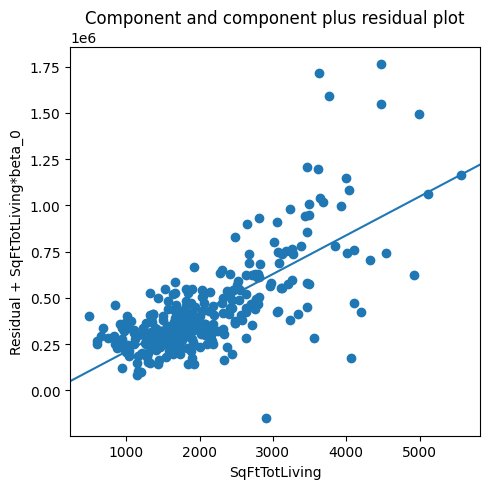

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
fig = sm.graphics.plot_ccpr(result_98105, 'SqFtTotLiving', ax=ax)

plt.tight_layout()
plt.show()

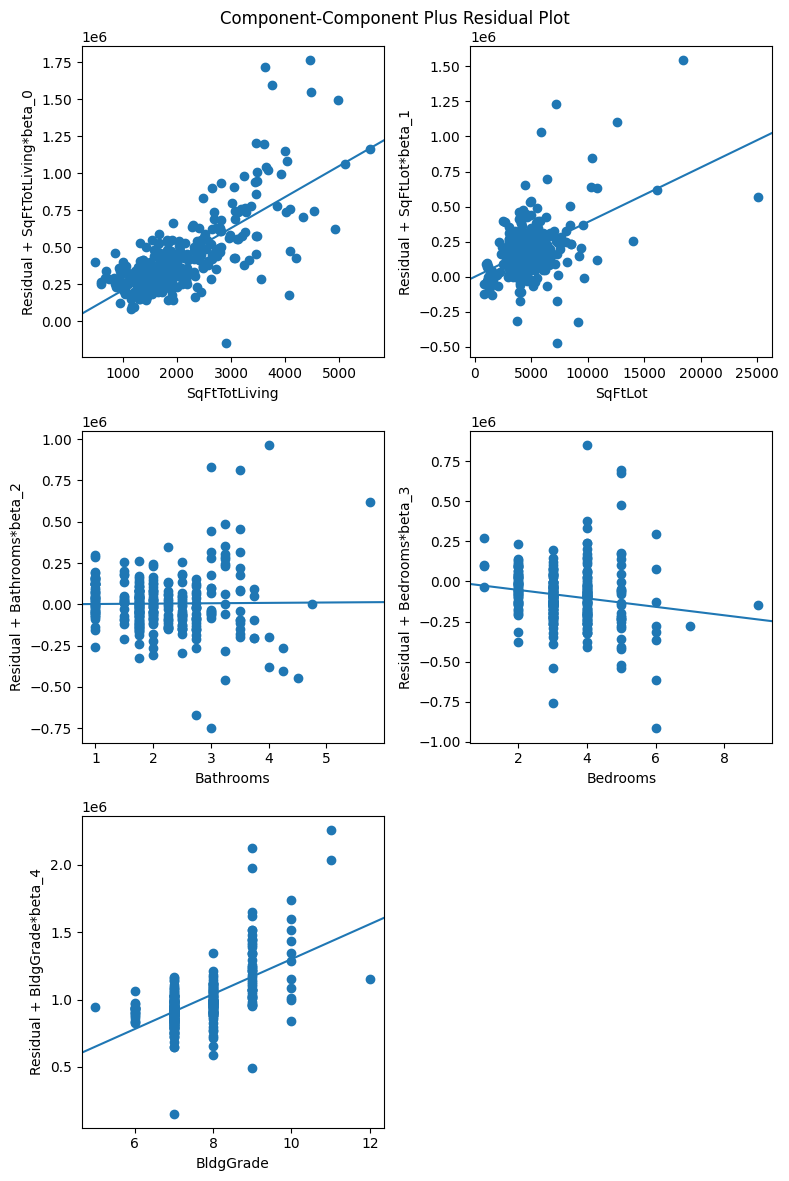

In [ ]:
fig = plt.figure(figsize=(8, 12))
fig = sm.graphics.plot_ccpr_grid(result_98105, fig=fig)

In [ ]:
model_poly = smf.ols(formula='AdjSalePrice ~  SqFtTotLiving + np.power(SqFtTotLiving, 2) + ' +
                'SqFtLot + Bathrooms + Bedrooms + BldgGrade', data=house_98105)
result_poly = model_poly.fit()
print(result_poly.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     211.6
Date:                Fri, 15 Dec 2023   Prob (F-statistic):          9.95e-106
Time:                        14:15:38   Log-Likelihood:                -4217.9
No. Observations:                 313   AIC:                             8450.
Df Residuals:                     306   BIC:                             8476.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

# 5장 분류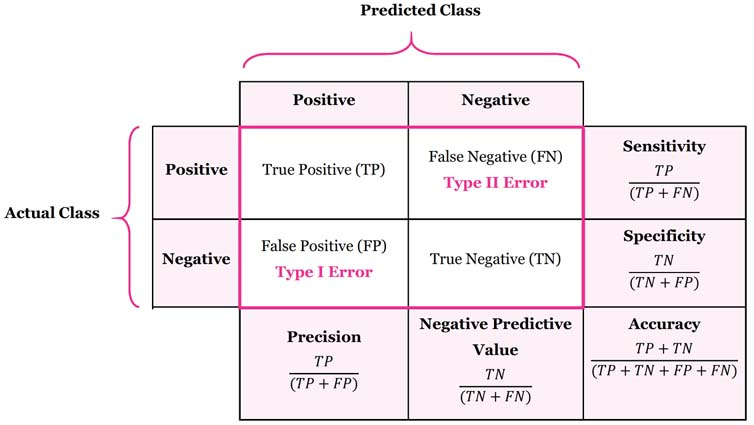

In [ ]:
pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 22.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 23.2 MB/s eta 0:00:00


In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np

from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression #, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score

import statsmodels.api as sm

from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from pygam import LinearGAM, s, f, l


from dmba import classificationSummary

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Colab environment detected.


In [ ]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [ ]:
LOAN_DATA_CSV=pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loan_data.csv.gz')
LOAN3000_CSV=pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loan3000.csv')
FULL_TRAIN_SET_CSV=pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/full_train_set.csv.gz')



In [ ]:
# 나이브 베이즈

loan_data = LOAN_DATA_CSV

# print(loan_data.describe())
# print(loan_data.columns)
# print(loan_data['outcome'])

# print(loan_data['outcome'].dtypes)

# 범주형 데이터로 변환
# 예측변수(outcome)
# 반응변수(purpose, home, emp_len)

loan_data.outcome = loan_data.outcome.astype('category')
loan_data.outcome.cat.reorder_categories(['paid off', 'default'])

loan_data.purpose_ = loan_data.purpose_.astype('category')
loan_data.home_ = loan_data.home_.astype('category')
loan_data.emp_len_ = loan_data.emp_len_.astype('category')

predictors = ['purpose_', 'home_', 'emp_len_']
outcome = 'outcome'

# 원핫 인코딩
X = pd.get_dummies(loan_data[predictors], prefix='', prefix_sep='', dtype=int)
y = loan_data[outcome]


naive_model = MultinomialNB(alpha=0.01, fit_prior=True)
naive_model = MultinomialNB(alpha=1e-10, fit_prior=False)
naive_model.fit(X, y)

new_loan = X.loc[146:146, :]
print('predicted class: ', naive_model.predict(new_loan)[0])

probabilities = pd.DataFrame(naive_model.predict_proba(new_loan),
                             columns=naive_model.classes_)
print('predicted probabilities',)
print(probabilities)

predicted class:  default
predicted probabilities
    default  paid off
0  0.653699  0.346301


In [ ]:
loan3000=pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loan3000.csv')
loan3000.outcome = loan3000.outcome.astype('category')

predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = loan3000[outcome]

loan_lda = LinearDiscriminantAnalysis()
loan_lda.fit(X, y)
print(pd.DataFrame(loan_lda.scalings_, index=X.columns))

                          0
borrower_score     7.175839
payment_inc_ratio -0.099676


In [ ]:
pred = pd.DataFrame(loan_lda.predict_proba(loan3000[predictors]),
                    columns=loan_lda.classes_)
print(pred.head())

    default  paid off
0  0.553544  0.446456
1  0.558953  0.441047
2  0.272696  0.727304
3  0.506254  0.493746
4  0.609952  0.390048


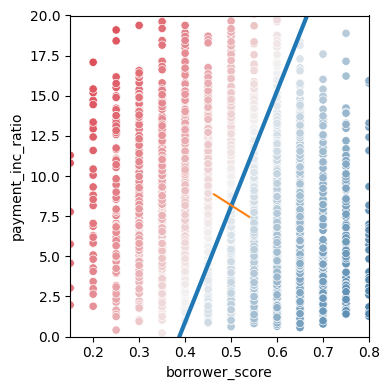

In [ ]:
# Use scalings and center of means to determine decision boundary
center = np.mean(loan_lda.means_, axis=0)
slope = - loan_lda.scalings_[0] / loan_lda.scalings_[1]
intercept = center[1] - center[0] * slope

# payment_inc_ratio for borrower_score of 0 and 20
x_0 = (0 - intercept) / slope
x_20 = (20 - intercept) / slope

lda_df = pd.concat([loan3000, pred['default']], axis=1)
lda_df.head()

fig, ax = plt.subplots(figsize=(4, 4))
g = sns.scatterplot(x='borrower_score', y='payment_inc_ratio',
                    hue='default', data=lda_df,
                    palette=sns.diverging_palette(240, 10, n=9, as_cmap=True),
                    ax=ax, legend=False)

ax.set_ylim(0, 20)
ax.set_xlim(0.15, 0.8)
ax.plot((x_0, x_20), (0, 20), linewidth=3)
ax.plot(*loan_lda.means_.transpose())

plt.tight_layout()
plt.show()

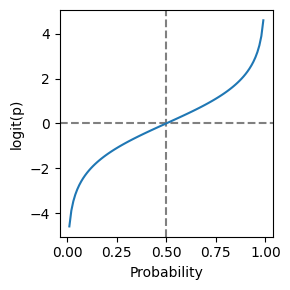

In [ ]:
# 로지스틱 회귀
p = np.arange(0.01, 1, 0.01)
df = pd.DataFrame({
    'p': p,
    'logit': np.log(p / (1 - p)),
    'odds': p / (1 - p),
})

fig, ax = plt.subplots(figsize=(3, 3))
ax.axhline(0, color='grey', linestyle='--')
ax.axvline(0.5, color='grey', linestyle='--')
ax.plot(df['p'], df['logit'])
ax.set_xlabel('Probability')
ax.set_ylabel('logit(p)')

plt.tight_layout()
plt.show()

In [ ]:
predictors = ['payment_inc_ratio', 'purpose_', 'home_', 'emp_len_',
              'borrower_score']
outcome = 'outcome'
X = pd.get_dummies(loan_data[predictors], prefix='', prefix_sep='',
                   drop_first=True, dtype=int)
y = loan_data[outcome] # .cat.categories

logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
logit_reg.fit(X, y)

print('intercept ', logit_reg.intercept_[0])
print('classes', logit_reg.classes_)
pd.DataFrame({'coeff': logit_reg.coef_[0]},
             index=X.columns)

intercept  -1.6380882883923482
classes ['default' 'paid off']


,coeff
payment_inc_ratio,-0.079728
borrower_score,4.611037
debt_consolidation,-0.249342
home_improvement,-0.407614
major_purchase,-0.229376
medical,-0.510087
other,-0.620534
small_business,-1.215662
OWN,-0.048453
RENT,-0.157355


In [ ]:
print(loan_data['purpose_'].cat.categories)
print(loan_data['home_'].cat.categories)
print(loan_data['emp_len_'].cat.categories)

Index(['credit_card', 'debt_consolidation', 'home_improvement',
       'major_purchase', 'medical', 'other', 'small_business'],
      dtype='object')
Index(['MORTGAGE', 'OWN', 'RENT'], dtype='object')
Index([' < 1 Year', ' > 1 Year'], dtype='object')


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories=[['paid off', 'default']])
y_enc = enc.fit_transform(loan_data[[outcome]]).ravel()

logit_reg_enc = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg_enc.fit(X, y_enc)

print('intercept ', logit_reg_enc.intercept_[0])
print('classes', logit_reg_enc.classes_)
pd.DataFrame({'coeff': logit_reg_enc.coef_[0]},
             index=X.columns)

intercept  1.6378909416318836
classes [0. 1.]


,coeff
payment_inc_ratio,0.079739
borrower_score,-4.612183
debt_consolidation,0.249414
home_improvement,0.407734
major_purchase,0.229710
medical,0.510744
other,0.620800
small_business,1.214936
OWN,0.048211
RENT,0.157288


In [ ]:
pred = pd.DataFrame(logit_reg.predict_log_proba(X),
                    columns=logit_reg.classes_)
print(pred.describe())

            default      paid off
count  45342.000000  45342.000000
mean      -0.757850     -0.760423
std        0.378032      0.390419
min       -2.768873     -3.538865
25%       -0.985728     -0.977164
50%       -0.697366     -0.688946
75%       -0.472209     -0.467076
max       -0.029476     -0.064787


In [ ]:
pred = pd.DataFrame(logit_reg.predict_proba(X),
                    columns=logit_reg.classes_)
print(pred.describe())

            default      paid off
count  45342.000000  45342.000000
mean       0.500001      0.499999
std        0.167336      0.167336
min        0.062733      0.029046
25%        0.373167      0.376377
50%        0.497895      0.502105
75%        0.623623      0.626833
max        0.970954      0.937267


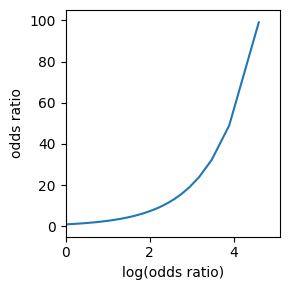

In [ ]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.plot(df['logit'], df['odds'])
ax.set_xlabel('log(odds ratio)')
ax.set_ylabel('odds ratio')
ax.set_xlim(0, 5.1)
ax.set_ylim(-5, 105)

plt.tight_layout()
plt.show()

In [ ]:
# use GLM (general linear model) with the binomial family to
# fit a logistic regression
y_numbers = [1 if yi == 'default' else 0 for yi in y]
logit_reg_sm = sm.GLM(y_numbers, X.assign(const=1),
                      family=sm.families.Binomial())
logit_result = logit_reg_sm.fit()
print(logit_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                45342
Model:                            GLM   Df Residuals:                    45330
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -28757.
Date:                Sun, 17 Dec 2023   Deviance:                       57515.
Time:                        09:17:30   Pearson chi2:                 4.54e+04
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1112
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
payment_inc_ratio      0.0797      0

In [ ]:
import statsmodels.formula.api as smf
formula = ('outcome ~ bs(payment_inc_ratio, df=8) + purpose_ + ' +
           'home_ + emp_len_ + bs(borrower_score, df=3)')
model = smf.glm(formula=formula, data=loan_data, family=sm.families.Binomial())
results = model.fit()
print(results.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['outcome[default]', 'outcome[paid off]']   No. Observations:                45342
Model:                                                   GLM   Df Residuals:                    45321
Model Family:                                       Binomial   Df Model:                           20
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -28731.
Date:                                       Sun, 17 Dec 2023   Deviance:                       57462.
Time:                                               09:20:17   Pearson chi2:                 4.54e+04
No. Iterations:                                            6   Pseudo R-squ. (CS):             0.1122
Covariance Type:                                   nonrobust                      

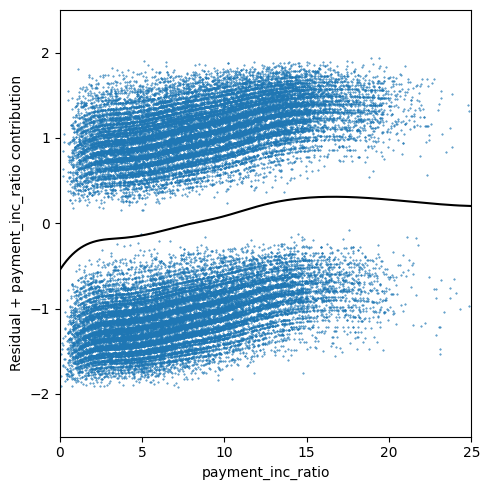

In [ ]:
from statsmodels.genmod.generalized_linear_model import GLMResults
def partialResidualPlot(model, df, outcome, feature, fig, ax):
    y_actual = [0 if s == 'default' else 1 for s in df[outcome]]
    y_pred = model.predict(df)
    org_params = model.params.copy()
    zero_params = model.params.copy()
    # set model parametes of other features to 0
    for i, name in enumerate(zero_params.index):
        if feature in name:
            continue
        zero_params[i] = 0.0
    model.initialize(model.model, zero_params)
    feature_prediction = model.predict(df)
    ypartial = -np.log(1/feature_prediction - 1)
    ypartial = ypartial - np.mean(ypartial)
    model.initialize(model.model, org_params)
    results = pd.DataFrame({
        'feature': df[feature],
        'residual': -2 * (y_actual - y_pred),
        'ypartial': ypartial/ 2,
    })
    results = results.sort_values(by=['feature'])

    ax.scatter(results.feature, results.residual, marker=".", s=72./fig.dpi)
    ax.plot(results.feature, results.ypartial, color='black')
    ax.set_xlabel(feature)
    ax.set_ylabel(f'Residual + {feature} contribution')
    return ax

fig, ax = plt.subplots(figsize=(5, 5))
partialResidualPlot(results, loan_data, 'outcome', 'payment_inc_ratio', fig, ax)
ax.set_xlim(0, 25)
ax.set_ylim(-2.5, 2.5)


plt.tight_layout()
plt.show()

In [ ]:
# Confusion matrix
pred = logit_reg.predict(X)
pred_y = logit_reg.predict(X) == 'default'
true_y = y == 'default'
true_pos = true_y & pred_y
true_neg = ~true_y & ~pred_y
false_pos = ~true_y & pred_y
false_neg = true_y & ~pred_y

conf_mat = pd.DataFrame([[np.sum(true_pos), np.sum(false_neg)], [np.sum(false_pos), np.sum(true_neg)]],
                       index=['Y = default', 'Y = paid off'],
                       columns=['Yhat = default', 'Yhat = paid off'])
print(conf_mat)

              Yhat = default  Yhat = paid off
Y = default            14336             8335
Y = paid off            8148            14523


In [ ]:
print(confusion_matrix(y, logit_reg.predict(X)))

[[14336  8335]
 [ 8148 14523]]


In [ ]:
classificationSummary(y, logit_reg.predict(X),
                      class_names=logit_reg.classes_)

Confusion Matrix (Accuracy 0.6365)

         Prediction
  Actual  default paid off
 default    14336     8335
paid off     8148    14523


In [ ]:
conf_mat = confusion_matrix(y, logit_reg.predict(X))
print('Precision', conf_mat[0, 0] / sum(conf_mat[:, 0]))
print('Recall', conf_mat[0, 0] / sum(conf_mat[0, :]))
print('Specificity', conf_mat[1, 1] / sum(conf_mat[1, :]))

Precision 0.6376089663760897
Recall 0.6323496978518812
Specificity 0.6405981209474659


https://namu.wiki/w/%ED%98%BC%EB%8F%99%ED%96%89%EB%A0%AC

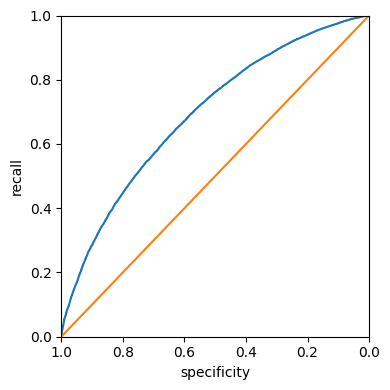

In [ ]:
# ROC 곡선

fpr, tpr, thresholds = roc_curve(y, logit_reg.predict_proba(X)[:, 0],
                                 pos_label='default')
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')


plt.tight_layout()
plt.show()

In [ ]:
# AOC 곡선

print(np.sum(roc_df.recall[:-1] * np.diff(1 - roc_df.specificity)))
print(roc_auc_score([1 if yi == 'default' else 0 for yi in y], logit_reg.predict_proba(X)[:, 0]))

0.691710795288669
0.6917108731135808


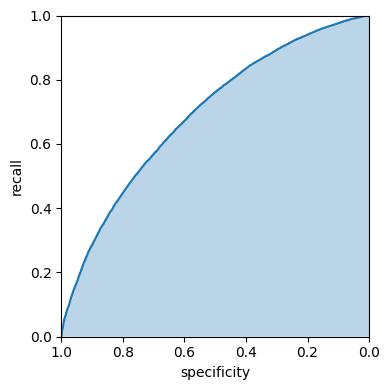

In [ ]:
fpr, tpr, thresholds = roc_curve(y, logit_reg.predict_proba(X)[:,0],
                                 pos_label='default')
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
# ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
FULL_TRAIN_SET_CSV=pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/full_train_set.csv.gz')
full_train_set = FULL_TRAIN_SET_CSV
print(full_train_set.shape)

(119987, 19)


In [ ]:
print('percentage of loans in default: ',
print(      100 * np.mean(full_train_set.outcome == 'default')))

18.894546909248504
percentage of loans in default:  None


In [ ]:
predictors = ['payment_inc_ratio', 'purpose_', 'home_', 'emp_len_',
              'dti', 'revol_bal', 'revol_util']
outcome = 'outcome'
X = pd.get_dummies(full_train_set[predictors], prefix='', prefix_sep='',
                   drop_first=True, dtype=int)
y = full_train_set[outcome]

full_model = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
full_model.fit(X, y)
print('percentage of loans predicted to default: ',
print(      100 * np.mean(full_model.predict(X) == 'default')))

0.9759390600648404
percentage of loans predicted to default:  None


In [ ]:
(np.mean(full_train_set.outcome == 'default') /
 np.mean(full_model.predict(X) == 'default'))

19.360375747224595

In [ ]:
default_wt = 1 / np.mean(full_train_set.outcome == 'default')
wt = [default_wt if outcome == 'default' else 1 for outcome in full_train_set.outcome]

full_model = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
full_model.fit(X, y, wt)
print('percentage of loans predicted to default (weighting): ',
print(      100 * np.mean(full_model.predict(X) == 'default')))

61.79836148916132
percentage of loans predicted to default (weighting):  None


In [ ]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print('percentage of loans in default (SMOTE resampled): ',
      100 * np.mean(y_resampled == 'default'))

full_model = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
full_model.fit(X_resampled, y_resampled)
print('percentage of loans predicted to default (SMOTE): ',
      100 * np.mean(full_model.predict(X) == 'default'))


X_resampled, y_resampled = ADASYN().fit_resample(X, y)
print('percentage of loans in default (ADASYN resampled): ',
      100 * np.mean(y_resampled == 'default'))

full_model = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
full_model.fit(X_resampled, y_resampled)
print('percentage of loans predicted to default (ADASYN): ',
print(      100 * np.mean(full_model.predict(X) == 'default')))

percentage of loans in default (SMOTE resampled):  50.0
percentage of loans predicted to default (SMOTE):  29.497362214239875
percentage of loans in default (ADASYN resampled):  48.56040383751355
27.89052147315959
percentage of loans predicted to default (ADASYN):  None


In [ ]:
predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = loan3000[outcome]

loan_tree = DecisionTreeClassifier(random_state=1, criterion='entropy',
                                   min_impurity_decrease=0.003)
loan_tree.fit(X, y)

loan_lda = LinearDiscriminantAnalysis()
loan_lda.fit(X, y)

logit_reg = LogisticRegression(penalty="l2", solver='liblinear')
logit_reg.fit(X, y)


## model
gam = LinearGAM(s(0) + s(1))
print(gam.gridsearch(X.values, [1 if yi == 'default' else 0 for yi in y]))

100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + s(1) + intercept, 
   tol=0.0001, verbose=False)


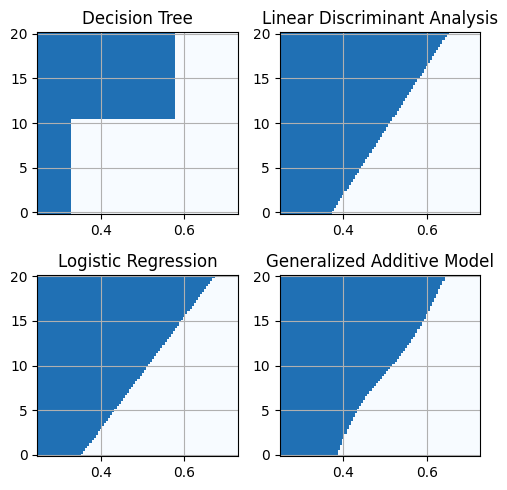

In [ ]:
models = {
    'Decision Tree': loan_tree,
    'Linear Discriminant Analysis': loan_lda,
    'Logistic Regression': logit_reg,
    'Generalized Additive Model': gam,
}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 5))

xvalues = np.arange(0.25, 0.73, 0.005)
yvalues = np.arange(-0.1, 20.1, 0.1)
xx, yy = np.meshgrid(xvalues, yvalues)
X = pd.DataFrame({
    'borrower_score': xx.ravel(),
    'payment_inc_ratio': yy.ravel(),
})

boundary = {}

for n, (title, model) in enumerate(models.items()):
    ax = axes[n // 2, n % 2]
    predict = model.predict(X)
    if 'Generalized' in title:
        Z = np.array([1 if z > 0.5 else 0 for z in predict])
    else:

        Z = np.array([1 if z == 'default' else 0 for z in predict])
    Z = Z.reshape(xx.shape)
    boundary[title] = yvalues[np.argmax(Z > 0, axis=0)]
    boundary[title][Z[-1,:] == 0] = yvalues[-1]

    c = ax.pcolormesh(xx, yy, Z, cmap='Blues', vmin=0.1, vmax=1.3, shading='auto')
    ax.set_title(title)
    ax.grid(True)

plt.tight_layout()

# 6장 통계적 머신러닝

In [2]:
pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 17.8 MB/s eta 0:00:00


In [3]:
import math
import os
import random
from pathlib import Path
from collections import defaultdict
from itertools import product


import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from dmba import plotDecisionTree, textDecisionTree

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

%matplotlib inline

Colab environment detected.


In [4]:
# load data set

LOAN200_CSV=pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loan200.csv')
LOAN_DATA_CSV=pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loan_data.csv.gz')
LOAN3000_CSV=pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loan3000.csv')
FULL_TRAIN_SET_CSV=pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/full_train_set.csv.gz')



In [5]:
# os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [10]:
# KNN K 최근접 이웃

loan200 = LOAN200_CSV

predictors = ['payment_inc_ratio', 'dti']
outcome = 'outcome'
# print(loan200)

newloan = loan200.loc[0:0, predictors]
X = loan200.loc[1:, predictors]
y = loan200.loc[1:, outcome]

# print(newloan)

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X, y)
knn.predict(newloan)
print(knn.predict_proba(newloan))



[[0.45 0.55]]


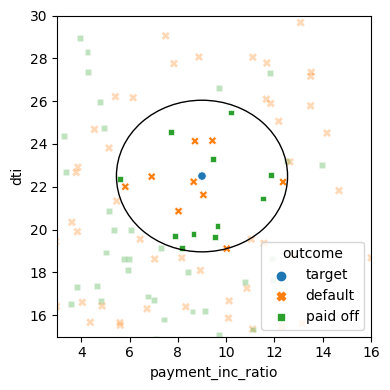

In [12]:
# Data visualization

nbrs = knn.kneighbors(newloan)
maxDistance = np.max(nbrs[0][0])

fig, ax = plt.subplots(figsize=(4, 4))
sns.scatterplot(x='payment_inc_ratio', y='dti', style='outcome',
                hue='outcome', data=loan200, alpha=0.3, ax=ax)
sns.scatterplot(x='payment_inc_ratio', y='dti', style='outcome',
                hue='outcome',
                data=pd.concat([loan200.loc[0:0, :], loan200.loc[nbrs[1][0] + 1,:]]),
                ax=ax, legend=False)
ellipse = Ellipse(xy=newloan.values[0],
                  width=2 * maxDistance, height=2 * maxDistance,
                  edgecolor='black', fc='None', lw=1)
ax.add_patch(ellipse)
ax.set_xlim(3, 16)
ax.set_ylim(15, 30)

plt.tight_layout()
plt.show()

In [13]:
# Standardization (Normalization, Z-Scores) 표준화

loan_data = LOAN_DATA_CSV
loan_data = loan_data.drop(columns=['Unnamed: 0', 'status'])
loan_data['outcome'] = pd.Categorical(loan_data['outcome'],
                                      categories=['paid off', 'default'],
                                      ordered=True)


predictors = ['payment_inc_ratio', 'dti', 'revol_bal', 'revol_util']
outcome = 'outcome'

newloan = loan_data.loc[0:0, predictors]
print(newloan)
X = loan_data.loc[1:, predictors]
y = loan_data.loc[1:, outcome]

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

nbrs = knn.kneighbors(newloan)
print(X.iloc[nbrs[1][0], :])

   payment_inc_ratio  dti  revol_bal  revol_util
0             2.3932  1.0       1687         9.4
       payment_inc_ratio   dti  revol_bal  revol_util
35536            1.47212  1.46       1686        10.0
33651            3.38178  6.37       1688         8.4
25863            2.36303  1.39       1691         3.5
42953            1.28160  7.14       1684         3.9
43599            4.12244  8.98       1684         7.2


In [14]:

newloan = loan_data.loc[0:0, predictors]
X = loan_data.loc[1:, predictors]
y = loan_data.loc[1:, outcome]

scaler = preprocessing.StandardScaler()
scaler.fit(X * 1.0)

X_std = scaler.transform(X * 1.0)
newloan_std = scaler.transform(newloan * 1.0)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_std, y)

nbrs = knn.kneighbors(newloan_std)
print(X.iloc[nbrs[1][0], :])

       payment_inc_ratio   dti  revol_bal  revol_util
2080             2.61091  1.03       1218         9.7
1438             2.34343  0.51        278         9.9
30215            2.71200  1.34       1075         8.5
28542            2.39760  0.74       2917         7.4
44737            2.34309  1.37        488         7.2


count    45342.000000
mean         0.501098
std          0.128736
min          0.000000
25%          0.400000
50%          0.500000
75%          0.600000
max          0.950000
Name: borrower_score, dtype: float64


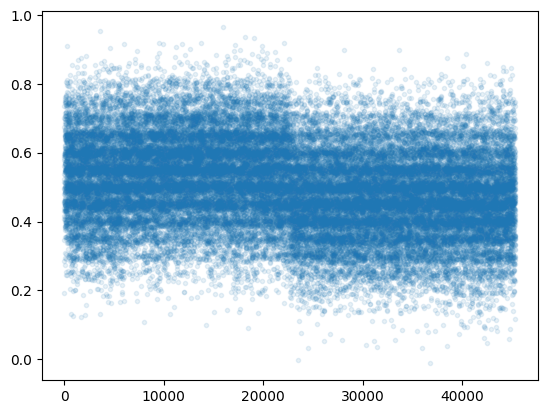

In [16]:
loan_data = LOAN_DATA_CSV
loan_data = loan_data.drop(columns=['Unnamed: 0', 'status'])
loan_data['outcome'] = pd.Categorical(loan_data['outcome'],
                                      categories=['paid off', 'default'],
                                      ordered=True)

predictors = ['dti', 'revol_bal', 'revol_util', 'open_acc',
              'delinq_2yrs_zero', 'pub_rec_zero']
outcome = 'outcome'

X = loan_data[predictors]
y = loan_data[outcome]

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X, y)
plt.scatter(range(len(X)), [bs + random.gauss(0, 0.015) for bs in knn.predict_proba(X)[:,0]],
            alpha=0.1, marker='.')
knn.predict_proba(X)[:, 0]

loan_data['borrower_score'] = knn.predict_proba(X)[:, 0]
print(loan_data['borrower_score'].describe())

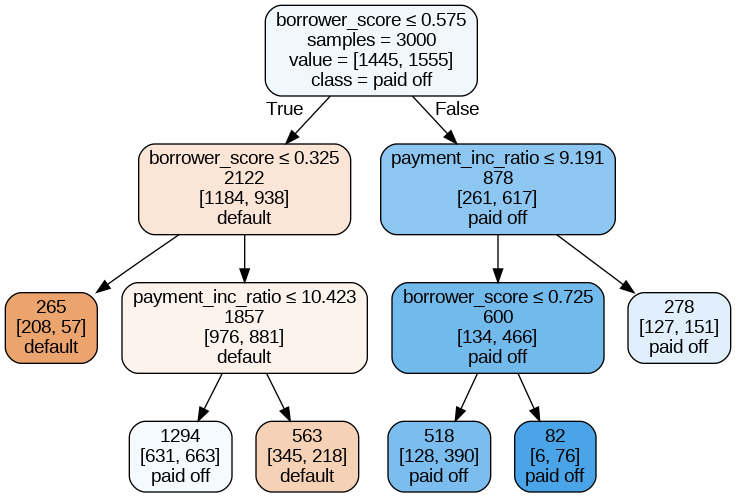

In [17]:
# Tree model
loan3000 = (LOAN3000_CSV)

predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = loan3000[outcome]

loan_tree = DecisionTreeClassifier(random_state=1, criterion='entropy',
                                   min_impurity_decrease=0.003)
loan_tree.fit(X, y)
plotDecisionTree(loan_tree, feature_names=predictors, class_names=loan_tree.classes_)

In [18]:
print(textDecisionTree(loan_tree))

node=0 test node: go to node 1 if 0 <= 0.5750000178813934 else to node 6
  node=1 test node: go to node 2 if 0 <= 0.32500000298023224 else to node 3
    node=2 leaf node: [[0.785, 0.215]]
    node=3 test node: go to node 4 if 1 <= 10.42264986038208 else to node 5
      node=4 leaf node: [[0.488, 0.512]]
      node=5 leaf node: [[0.613, 0.387]]
  node=6 test node: go to node 7 if 1 <= 9.19082498550415 else to node 10
    node=7 test node: go to node 8 if 0 <= 0.7249999940395355 else to node 9
      node=8 leaf node: [[0.247, 0.753]]
      node=9 leaf node: [[0.073, 0.927]]
    node=10 leaf node: [[0.457, 0.543]]


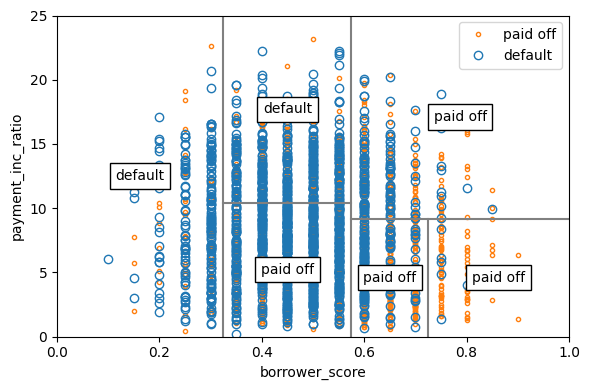

In [19]:
# 재귀 분할 알고리즘
fig, ax = plt.subplots(figsize=(6, 4))

loan3000.loc[loan3000.outcome=='paid off'].plot(
    x='borrower_score', y='payment_inc_ratio', style='.',
    markerfacecolor='none', markeredgecolor='C1', ax=ax)
loan3000.loc[loan3000.outcome=='default'].plot(
    x='borrower_score', y='payment_inc_ratio', style='o',
    markerfacecolor='none', markeredgecolor='C0', ax=ax)
ax.legend(['paid off', 'default']);
ax.set_xlim(0, 1)
ax.set_ylim(0, 25)
ax.set_xlabel('borrower_score')
ax.set_ylabel('payment_inc_ratio')

x0 = 0.575
x1a = 0.325; y1b = 9.191
y2a = 10.423; x2b = 0.725
ax.plot((x0, x0), (0, 25), color='grey')
ax.plot((x1a, x1a), (0, 25), color='grey')
ax.plot((x0, 1), (y1b, y1b), color='grey')
ax.plot((x1a, x0), (y2a, y2a), color='grey')
ax.plot((x2b, x2b), (0, y1b), color='grey')

labels = [('default', (x1a / 2, 25 / 2)),
          ('default', ((x0 + x1a) / 2, (25 + y2a) / 2)),
          ('paid off', ((x0 + x1a) / 2, y2a / 2)),
          ('paid off', ((1 + x0) / 2, (y1b + 25) / 2)),
          ('paid off', ((1 + x2b) / 2, (y1b + 0) / 2)),
          ('paid off', ((x0 + x2b) / 2, (y1b + 0) / 2)),
         ]
for label, (x, y) in labels:
    ax.text(x, y, label, bbox={'facecolor':'white'},
            verticalalignment='center', horizontalalignment='center')

plt.tight_layout()
plt.show()

In [20]:
# 동질성과 불순도 측정
def entropyFunction(x):
    if x == 0: return 0
    return -x * math.log(x, 2) - (1 - x) * math.log(1 - x, 2)

def giniFunction(x):
    return x * (1 - x)

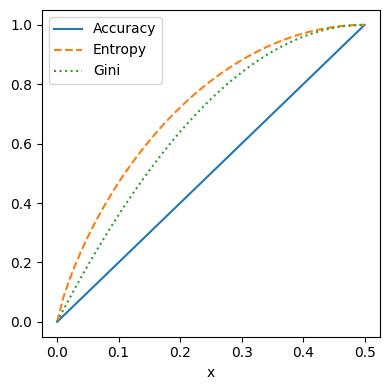

In [21]:
x = np.linspace(0, 0.5, 50)
impure = pd.DataFrame({
    'x': x,
    'Accuracy': 2 * x,
    'Gini': [giniFunction(xi) / giniFunction(.5) for xi in x],
    'Entropy': [entropyFunction(xi) for xi in x],
})

fig, ax = plt.subplots(figsize=(4, 4))

impure.plot(x='x', y='Accuracy', ax=ax, linestyle='solid')
impure.plot(x='x', y='Entropy', ax=ax, linestyle='--')
impure.plot(x='x', y='Gini', ax=ax, linestyle=':')

plt.tight_layout()
plt.show()

In [22]:
# Bagging and the Random Forest
# Random Forest

predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = loan3000[outcome]

rf = RandomForestClassifier(n_estimators=500, random_state=1,
                            oob_score=True)
rf.fit(X, y)
print(rf.oob_decision_function_)

[[0.18131868 0.81868132]
 [0.26704545 0.73295455]
 [0.93333333 0.06666667]
 ...
 [1.         0.        ]
 [0.73157895 0.26842105]
 [0.68085106 0.31914894]]


In [23]:
n_estimator = list(range(20, 510, 5))
oobScores = []
for n in n_estimator:
    rf = RandomForestClassifier(n_estimators=n,
                                criterion='entropy', max_depth=5,
                                random_state=1, oob_score=True)
    rf.fit(X, y)
    oobScores.append(rf.oob_score_)

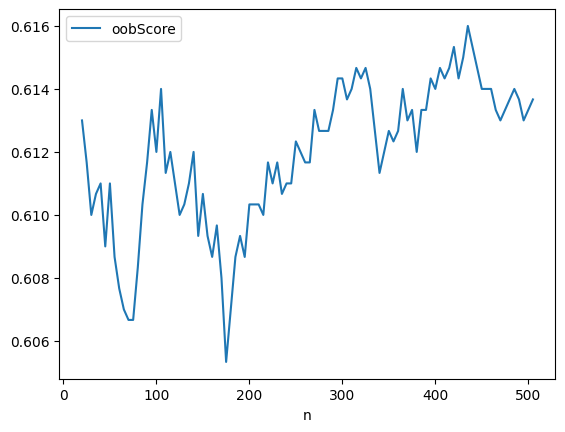

In [24]:
pd.DataFrame({
    'n': n_estimator,
    'oobScore': oobScores
}).plot(x='n', y='oobScore')
plt.show()

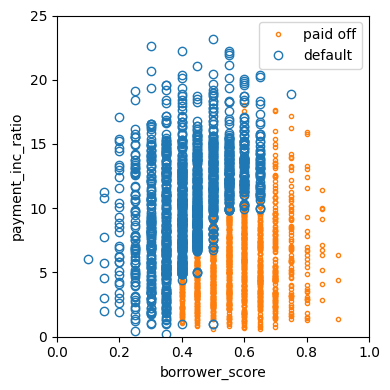

In [25]:
predictions = X.copy()
predictions['prediction'] = rf.predict(X)
predictions.head()

fig, ax = plt.subplots(figsize=(4, 4))

predictions.loc[predictions.prediction=='paid off'].plot(
    x='borrower_score', y='payment_inc_ratio', style='.',
    markerfacecolor='none', markeredgecolor='C1', ax=ax)
predictions.loc[predictions.prediction=='default'].plot(
    x='borrower_score', y='payment_inc_ratio', style='o',
    markerfacecolor='none', markeredgecolor='C0', ax=ax)
ax.legend(['paid off', 'default']);
ax.set_xlim(0, 1)
ax.set_ylim(0, 25)
ax.set_xlabel('borrower_score')
ax.set_ylabel('payment_inc_ratio')

plt.tight_layout()
plt.show()

In [26]:
# 변수 중요도

predictors = ['loan_amnt', 'term', 'annual_inc', 'dti',
              'payment_inc_ratio', 'revol_bal', 'revol_util',
              'purpose', 'delinq_2yrs_zero', 'pub_rec_zero',
              'open_acc', 'grade', 'emp_length', 'purpose_',
              'home_', 'emp_len_', 'borrower_score']
outcome = 'outcome'

X = pd.get_dummies(loan_data[predictors], drop_first=True, dtype=int)
y = loan_data[outcome]

rf_all = RandomForestClassifier(n_estimators=500, random_state=1)
rf_all.fit(X, y)

rf_all_entropy = RandomForestClassifier(n_estimators=500, random_state=1,
                                        criterion='entropy')
print(rf_all_entropy.fit(X, y))

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=1)


In [27]:
rf = RandomForestClassifier(n_estimators=500)
scores = defaultdict(list)

# crossvalidate the scores on a number of different random splits of the data
for _ in range(3):
    train_X, valid_X, train_y, valid_y = train_test_split(X, y,
                                                          test_size=0.3)
    rf.fit(train_X, train_y)
    acc = metrics.accuracy_score(valid_y, rf.predict(valid_X))
    for column in X.columns:
        X_t = valid_X.copy()
        X_t[column] = np.random.permutation(X_t[column].values)
        shuff_acc = metrics.accuracy_score(valid_y, rf.predict(X_t))
        scores[column].append((acc-shuff_acc)/acc)
print('Features sorted by their score:')
print(sorted([(round(np.mean(score), 4), feat) for
              feat, score in scores.items()], reverse=True))

Features sorted by their score:
[(0.0718, 'borrower_score'), (0.0337, 'grade'), (0.0327, 'term_60 months'), (0.0119, 'annual_inc'), (0.0115, 'payment_inc_ratio'), (0.004, 'dti'), (0.0035, 'purpose_small_business'), (0.0034, 'purpose__small_business'), (0.0016, 'emp_length'), (0.0014, 'open_acc'), (0.0007, 'purpose_credit_card'), (0.0007, 'loan_amnt'), (0.0003, 'purpose_other'), (0.0002, 'purpose_house'), (0.0001, 'purpose_moving'), (-0.0, 'revol_util'), (-0.0, 'purpose_vacation'), (0.0, 'purpose__medical'), (0.0, 'purpose__major_purchase'), (-0.0, 'home__OWN'), (-0.0, 'emp_len__ > 1 Year'), (0.0, 'delinq_2yrs_zero'), (-0.0001, 'purpose_medical'), (-0.0001, 'purpose_major_purchase'), (-0.0001, 'home__RENT'), (-0.0003, 'purpose_wedding'), (-0.0004, 'purpose__other'), (-0.0005, 'purpose_home_improvement'), (-0.0005, 'purpose__home_improvement'), (-0.0005, 'purpose__debt_consolidation'), (-0.0007, 'pub_rec_zero'), (-0.0008, 'revol_bal'), (-0.0013, 'purpose_debt_consolidation')]


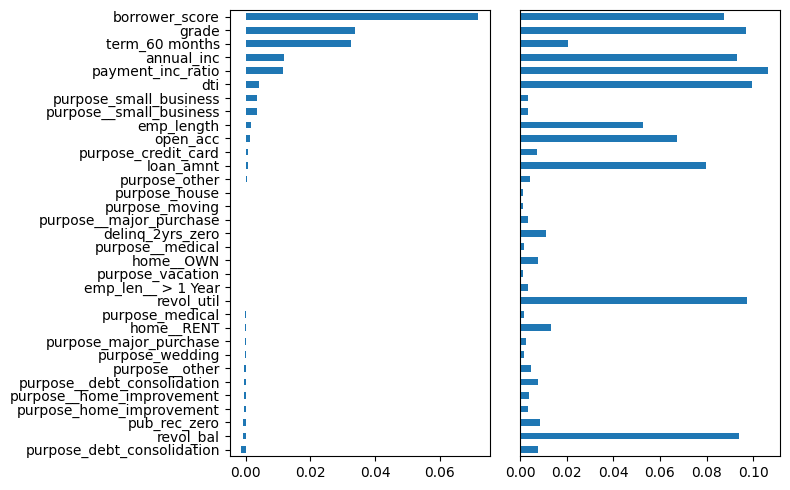

In [28]:
importances = rf_all.feature_importances_

df = pd.DataFrame({
    'feature': X.columns,
    'Accuracy decrease': [np.mean(scores[column]) for column in
                         X.columns],
    'Gini decrease': rf_all.feature_importances_,
    'Entropy decrease': rf_all_entropy.feature_importances_,
})
df = df.sort_values('Accuracy decrease')

fig, axes = plt.subplots(ncols=2, figsize=(8, 5))
ax = df.plot(kind='barh', x='feature', y='Accuracy decrease',
             legend=False, ax=axes[0])
ax.set_ylabel('')

ax = df.plot(kind='barh', x='feature', y='Gini decrease',
             legend=False, ax=axes[1])
ax.set_ylabel('')
ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

In [29]:
# Boosting
# XGBoost

predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = pd.Series([1 if o == 'default' else 0 for o in loan3000[outcome]])

xgb = XGBClassifier(objective='binary:logistic', subsample=.63,
                    use_label_encoder=False, eval_metric='error')
print(xgb.fit(X, y))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [31]:
xgb_df = X.copy()
xgb_df['prediction'] = ['default' if p == 1 else 'paid off' for p in xgb.predict(X)]
xgb_df['prob_default'] = xgb.predict_proba(X)[:, 0]
print(xgb_df.head())

   borrower_score  payment_inc_ratio prediction  prob_default
0            0.40            5.11135   paid off      0.586677
1            0.40            5.43165    default      0.307408
2            0.70            9.23003    default      0.337050
3            0.40            2.33482   paid off      0.861774
4            0.45           12.10320    default      0.056794


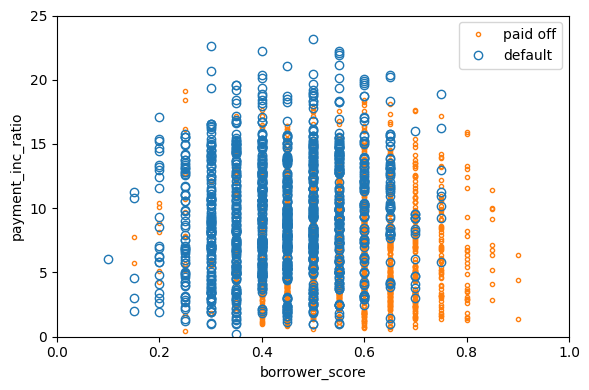

In [32]:
fig, ax = plt.subplots(figsize=(6, 4))

xgb_df.loc[xgb_df.prediction=='paid off'].plot(
    x='borrower_score', y='payment_inc_ratio', style='.',
    markerfacecolor='none', markeredgecolor='C1', ax=ax)
xgb_df.loc[xgb_df.prediction=='default'].plot(
    x='borrower_score', y='payment_inc_ratio', style='o',
    markerfacecolor='none', markeredgecolor='C0', ax=ax)
ax.legend(['paid off', 'default']);
ax.set_xlim(0, 1)
ax.set_ylim(0, 25)
ax.set_xlabel('borrower_score')
ax.set_ylabel('payment_inc_ratio')

plt.tight_layout()
plt.show()

In [33]:
# 정규화 오버피팅 피하기

predictors = ['loan_amnt', 'term', 'annual_inc', 'dti',
              'payment_inc_ratio', 'revol_bal', 'revol_util',
              'purpose', 'delinq_2yrs_zero', 'pub_rec_zero',
              'open_acc', 'grade', 'emp_length', 'purpose_',
              'home_', 'emp_len_', 'borrower_score']
outcome = 'outcome'

X = pd.get_dummies(loan_data[predictors], drop_first=True, dtype=int)
y = pd.Series([1 if o == 'default' else 0 for o in loan_data[outcome]])

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=10000)

xgb_default = XGBClassifier(objective='binary:logistic', n_estimators=250, max_depth=6,
                            reg_lambda=0, learning_rate=0.3, subsample=1,
                            use_label_encoder=False, eval_metric='error')
xgb_default.fit(train_X, train_y)

xgb_penalty = XGBClassifier(objective='binary:logistic', n_estimators=250, max_depth=6,
                            reg_lambda=1000, learning_rate=0.1, subsample=0.63,
                            use_label_encoder=False, eval_metric='error')
print(xgb_penalty.fit(train_X, train_y))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [34]:
pred_default = xgb_default.predict_proba(train_X)[:, 1]
error_default = abs(train_y - pred_default) > 0.5
print('default (train): ', np.mean(error_default))

pred_default = xgb_default.predict_proba(valid_X)[:, 1]
error_default = abs(valid_y - pred_default) > 0.5
print('default: ', np.mean(error_default))

pred_penalty = xgb_penalty.predict_proba(valid_X)[:, 1]
error_penalty = abs(valid_y - pred_penalty) > 0.5
print('penalty: ', np.mean(error_penalty))

default (train):  0.10245600135815744
default:  0.3615
penalty:  0.3276


In [35]:
results = []
for ntree_limit in range(1, 250):
    iteration_range = [1, ntree_limit + 1]
    train_default = xgb_default.predict_proba(train_X, iteration_range=iteration_range)[:, 1]
    train_penalty = xgb_penalty.predict_proba(train_X, iteration_range=iteration_range)[:, 1]
    pred_default = xgb_default.predict_proba(valid_X, iteration_range=iteration_range)[:, 1]
    pred_penalty = xgb_penalty.predict_proba(valid_X, iteration_range=iteration_range)[:, 1]
    results.append({
        'iterations': ntree_limit,
        'default train': np.mean(abs(train_y - train_default) > 0.5),
        'penalty train': np.mean(abs(train_y - train_penalty) > 0.5),
        'default test': np.mean(abs(valid_y - pred_default) > 0.5),
        'penalty test': np.mean(abs(valid_y - pred_penalty) > 0.5),
    })

results = pd.DataFrame(results)
print(results.head())

   iterations  default train  penalty train  default test  penalty test
0           1       0.344406       0.342708        0.3610        0.3536
1           2       0.332494       0.342567        0.3445        0.3503
2           3       0.326892       0.338662        0.3450        0.3460
3           4       0.321176       0.337672        0.3382        0.3462
4           5       0.318177       0.335918        0.3391        0.3442


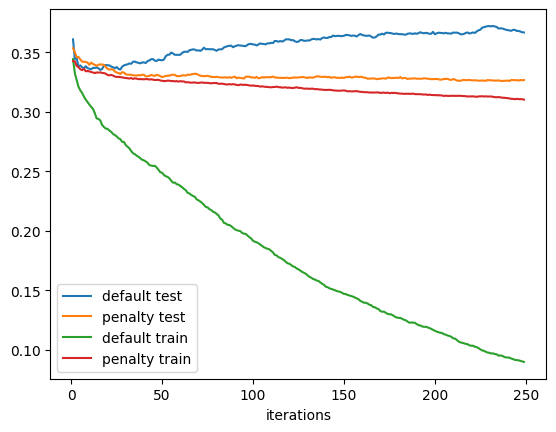

In [36]:
ax = results.plot(x='iterations', y='default test')
results.plot(x='iterations', y='penalty test', ax=ax)
results.plot(x='iterations', y='default train', ax=ax)
results.plot(x='iterations', y='penalty train', ax=ax)
plt.show()

In [37]:
#하이퍼 파라미터 교차 타당성 검증

idx = np.random.choice(range(5), size=len(X), replace=True)
error = []
for eta, max_depth in product([0.1, 0.5, 0.9], [3, 6, 9]):
    xgb = XGBClassifier(objective='binary:logistic', n_estimators=250,
                        max_depth=max_depth, learning_rate=eta,
                        eval_metric='error')
    cv_error = []
    for k in range(5):
        fold_idx = idx == k
        train_X = X.loc[~fold_idx]; train_y = y[~fold_idx]
        valid_X = X.loc[fold_idx]; valid_y = y[fold_idx]

        xgb.fit(train_X, train_y)
        pred = xgb.predict_proba(valid_X)[:, 1]
        cv_error.append(np.mean(abs(valid_y - pred) > 0.5))
    error.append({
        'eta': eta,
        'max_depth': max_depth,
        'avg_error': np.mean(cv_error)
    })
    print(error[-1])
errors = pd.DataFrame(error)
print(errors)


{'eta': 0.1, 'max_depth': 3, 'avg_error': 0.3273359923389755}
{'eta': 0.1, 'max_depth': 6, 'avg_error': 0.3351898568442005}
{'eta': 0.1, 'max_depth': 9, 'avg_error': 0.34548979123821716}
{'eta': 0.5, 'max_depth': 3, 'avg_error': 0.33704173650569}
{'eta': 0.5, 'max_depth': 6, 'avg_error': 0.36990809419654325}
{'eta': 0.5, 'max_depth': 9, 'avg_error': 0.37213492724041836}
{'eta': 0.9, 'max_depth': 3, 'avg_error': 0.35418410981893006}
{'eta': 0.9, 'max_depth': 6, 'avg_error': 0.3885910426988658}
{'eta': 0.9, 'max_depth': 9, 'avg_error': 0.3804708053828726}
   eta  max_depth  avg_error
0  0.1          3   0.327336
1  0.1          6   0.335190
2  0.1          9   0.345490
3  0.5          3   0.337042
4  0.5          6   0.369908
5  0.5          9   0.372135
6  0.9          3   0.354184
7  0.9          6   0.388591
8  0.9          9   0.380471


In [38]:
print(errors.pivot_table(index='eta', columns='max_depth', values='avg_error') * 100)

max_depth          3          6          9
eta                                       
0.1        32.733599  33.518986  34.548979
0.5        33.704174  36.990809  37.213493
0.9        35.418411  38.859104  38.047081


# 7장 비지도 학습

In [41]:
pip install prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 3.1 MB/s eta 0:00:00


In [42]:
import math
from pathlib import Path
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.stats import multivariate_normal

import prince

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import from_levels_and_colors
import seaborn as sns

%matplotlib inline

In [43]:
SP500_SECTORS_CSV =pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/sp500_sectors.csv')
HOUSE_TASKS_CSV =pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/housetasks.csv')
LOANS_INCOME_CSV=pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv')
SP500_DATA_CSV=pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/sp500_data.csv.gz' index_col=0)


In [46]:
sp500_px = SP500_DATA_CSV
oil_px = sp500_px[['XOM', 'CVX']]
print(oil_px.head())

        XOM       CVX
0 -0.016991  0.072921
1  0.016991  0.102089
2  0.084954  0.029168
3  0.067964  0.058337
4  0.034378  0.044272


In [47]:
pcs = PCA(n_components=2)
pcs.fit(oil_px)
loadings = pd.DataFrame(pcs.components_, columns=oil_px.columns)
print(loadings)

        XOM       CVX
0 -0.664711 -0.747101
1  0.747101 -0.664711


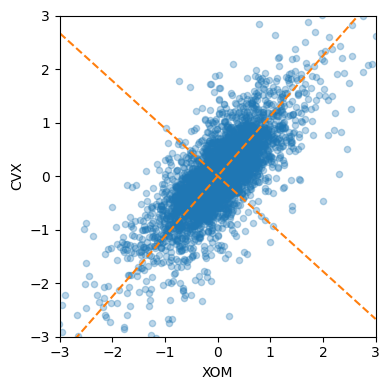

In [48]:
def abline(slope, intercept, ax):
    """Calculate coordinates of a line based on slope and intercept"""
    x_vals = np.array(ax.get_xlim())
    return (x_vals, intercept + slope * x_vals)

ax = oil_px.plot.scatter(x='XOM', y='CVX', alpha=0.3, figsize=(4, 4))
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.plot(*abline(loadings.loc[0, 'CVX'] / loadings.loc[0, 'XOM'], 0, ax),
        '--', color='C1')
ax.plot(*abline(loadings.loc[1, 'CVX'] / loadings.loc[1, 'XOM'], 0, ax),
        '--', color='C1')

plt.tight_layout()
plt.show()

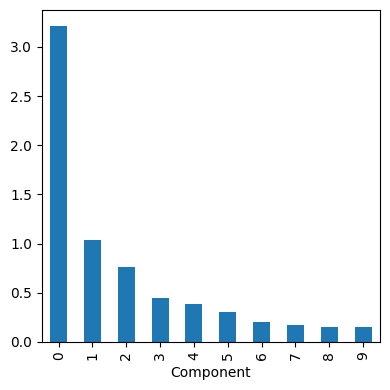

In [51]:
SP500_DATA_CSV=pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/sp500_data.csv.gz', index_col=0)
sp500_px=SP500_DATA_CSV
syms = sorted(['AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 'SLB', 'COP',
        'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST'])
top_sp = sp500_px.loc[sp500_px.index >= '2011-01-01', syms]

sp_pca = PCA()
sp_pca.fit(top_sp)

explained_variance = pd.DataFrame(sp_pca.explained_variance_)
ax = explained_variance.head(10).plot.bar(legend=False, figsize=(4, 4))
ax.set_xlabel('Component')

plt.tight_layout()
plt.show()

In [52]:
loadings = pd.DataFrame(sp_pca.components_[0:5, :],
                        columns=top_sp.columns)
print(loadings)

       AAPL       AXP       COP      COST      CSCO       CVX        HD  \
0 -0.300825 -0.246332 -0.261529 -0.273634 -0.064059 -0.444490 -0.207983   
1 -0.505116 -0.139426  0.174212 -0.416307 -0.031939  0.289373 -0.278002   
2 -0.786730  0.135458 -0.002367  0.465862 -0.007524  0.082374  0.166320   
3 -0.120586  0.061814 -0.206026  0.092596  0.003904 -0.577665  0.162814   
4  0.111576 -0.596666 -0.005813  0.555529 -0.039860  0.109016 -0.185488   

       INTC       JPM      MSFT       SLB       TGT       USB       WFC  \
0 -0.076956 -0.196397 -0.105012 -0.481786 -0.148833 -0.116421 -0.145684   
1 -0.033898 -0.040723 -0.053954  0.472494 -0.228123 -0.054796 -0.047427   
2 -0.003518  0.062261  0.016248 -0.194822  0.160833  0.048976  0.041932   
3 -0.001605  0.057687 -0.012558  0.680914  0.109895  0.016752  0.018614   
4 -0.072047 -0.385160 -0.077135  0.181332 -0.055557 -0.155440 -0.216425   

        WMT       XOM  
0 -0.122304 -0.317952  
1 -0.222889  0.154192  
2  0.175806  0.090167  
3 

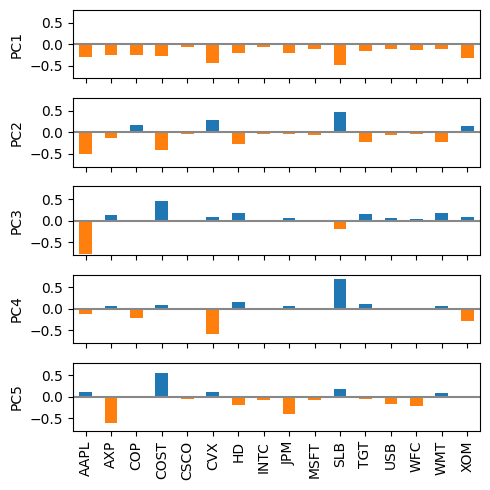

In [53]:
maxPC = 1.01 * loadings.loc[0:5, :].abs().to_numpy().max()

f, axes = plt.subplots(5, 1, figsize=(5, 5), sharex=True)

for i, ax in enumerate(axes):
    pc_loadings = loadings.loc[i, :]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-maxPC, maxPC)

plt.tight_layout()
plt.show()

In [55]:
pip install adjustText

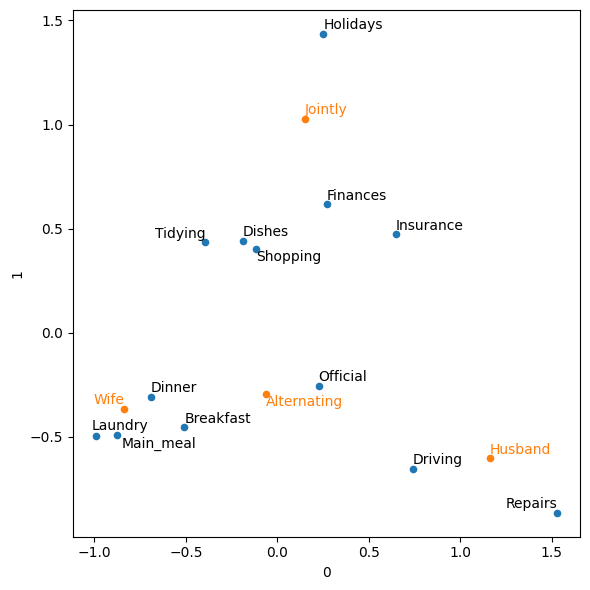

In [57]:
# 대응분석
from adjustText import adjust_text

housetasks = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/housetasks.csv', index_col=0)

ca = prince.CA(n_components=2)
ca = ca.fit(housetasks)

ax = ca.row_coordinates(housetasks).plot.scatter(x=0, y=1, figsize=(6,6))
ca.column_coordinates(housetasks).plot.scatter(x=0, y=1, ax=ax, c='C1')
texts = []
for idx, row in ca.row_coordinates(housetasks).iterrows():
    texts.append(plt.text(row[0], row[1], idx))
for idx, row in ca.column_coordinates(housetasks).iterrows():
    texts.append(plt.text(row[0], row[1], idx, color='C1'))
adjust_text(texts, only_move={'points':'y', 'texts':'y'})
plt.tight_layout()

In [58]:
# K-평균 클러스터링
SP500_DATA_CSV=pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/sp500_data.csv.gz', index_col=0)
sp500_px=SP500_DATA_CSV
df = sp500_px.loc[sp500_px.index >= '2011-01-01', ['XOM', 'CVX']]
kmeans = KMeans(n_clusters=4, n_init='auto').fit(df)
df['cluster'] = kmeans.labels_
print(df.head())

                 XOM       CVX  cluster
2011-01-03  0.736805  0.240681        2
2011-01-04  0.168668 -0.584516        0
2011-01-05  0.026631  0.446985        2
2011-01-06  0.248558 -0.919751        0
2011-01-07  0.337329  0.180511        2


In [59]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['XOM', 'CVX'])
print(centers)

        XOM       CVX
0 -0.330814 -0.574398
1  0.927032  1.346412
2  0.231540  0.316965
3 -1.144397 -1.757796


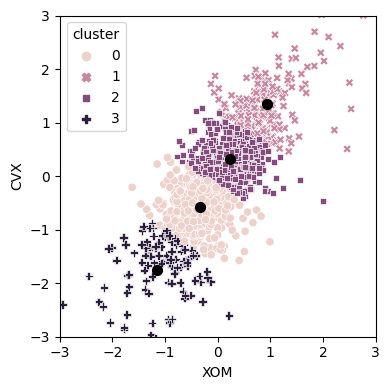

In [60]:
fig, ax = plt.subplots(figsize=(4, 4))
ax = sns.scatterplot(x='XOM', y='CVX', hue='cluster', style='cluster',
                     ax=ax, data=df)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
centers.plot.scatter(x='XOM', y='CVX', ax=ax, s=50, color='black')

plt.tight_layout()
plt.show()

In [61]:
syms = sorted(['AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 'SLB', 'COP',
               'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST'])
top_sp = sp500_px.loc[sp500_px.index >= '2011-01-01', syms]
kmeans = KMeans(n_clusters=5, n_init='auto').fit(top_sp)

In [62]:
from collections import Counter
print(Counter(kmeans.labels_))

Counter({4: 302, 2: 291, 3: 249, 1: 185, 0: 104})


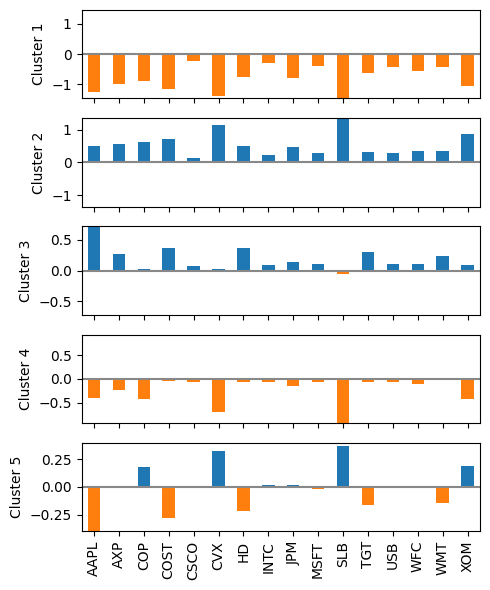

In [63]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=syms)

f, axes = plt.subplots(5, 1, figsize=(5, 6), sharex=True)
for i, ax in enumerate(axes):
    center = centers.loc[i, :]
    maxPC = 1.01 * np.max(np.max(np.abs(center)))
    colors = ['C0' if l > 0 else 'C1' for l in center]
    ax.axhline(color='#888888')
    center.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'Cluster {i + 1}')
    ax.set_ylim(-maxPC, maxPC)

plt.tight_layout()
plt.show()

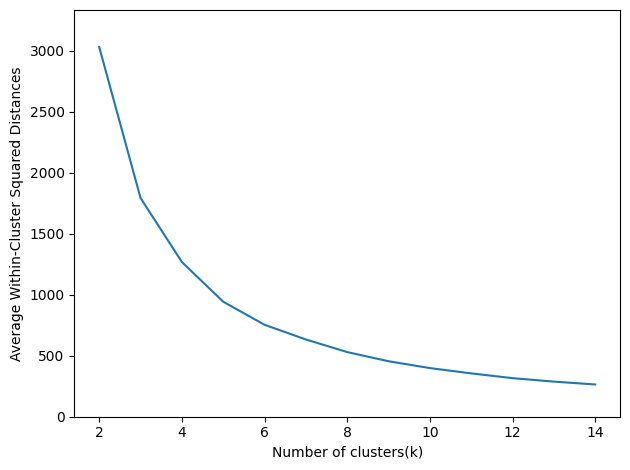

In [64]:
inertia = []
for n_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto').fit(top_sp)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(2, 15), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)

plt.tight_layout()
plt.show()

In [65]:
syms1 = ['AAPL', 'AMZN', 'AXP', 'COP', 'COST', 'CSCO', 'CVX', 'GOOGL', 'HD',
         'INTC', 'JPM', 'MSFT', 'SLB', 'TGT', 'USB', 'WFC', 'WMT', 'XOM']
df = sp500_px.loc[sp500_px.index >= '2011-01-01', syms1].transpose()

Z = linkage(df, method='complete')
print(Z.shape)

(17, 4)


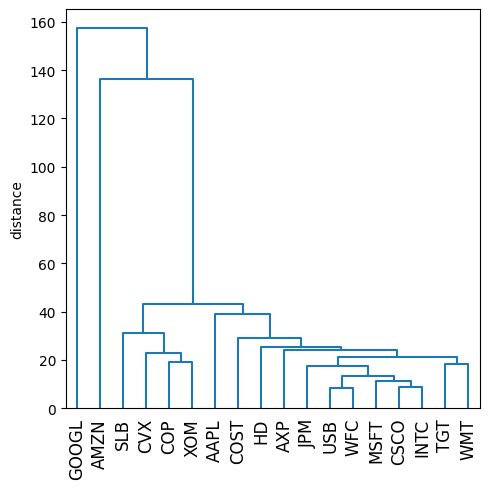

In [66]:
fig, ax = plt.subplots(figsize=(5, 5))
dendrogram(Z, labels=list(df.index), color_threshold=0)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

plt.tight_layout()
plt.show()

In [67]:
memb = fcluster(Z, 4, criterion='maxclust')
memb = pd.Series(memb, index=df.index)
for key, item in memb.groupby(memb):
    print(f"{key} : {', '.join(item.index)}")

1 : COP, CVX, SLB, XOM
2 : AAPL, AXP, COST, CSCO, HD, INTC, JPM, MSFT, TGT, USB, WFC, WMT
3 : AMZN
4 : GOOGL


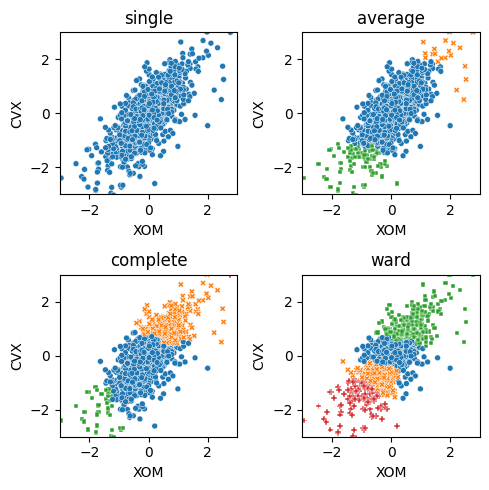

In [68]:
df = sp500_px.loc[sp500_px.index >= '2011-01-01', ['XOM', 'CVX']]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 5))
for i, method in enumerate(['single', 'average', 'complete', 'ward']):
    ax = axes[i // 2, i % 2]
    Z = linkage(df, method=method)
    colors = [f'C{c+1}' for c in fcluster(Z, 4, criterion='maxclust')]
    ax = sns.scatterplot(x='XOM', y='CVX', hue=colors, style=colors,
                         size=0.5, ax=ax, data=df, legend=False)

    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_title(method)

plt.tight_layout()
plt.show()

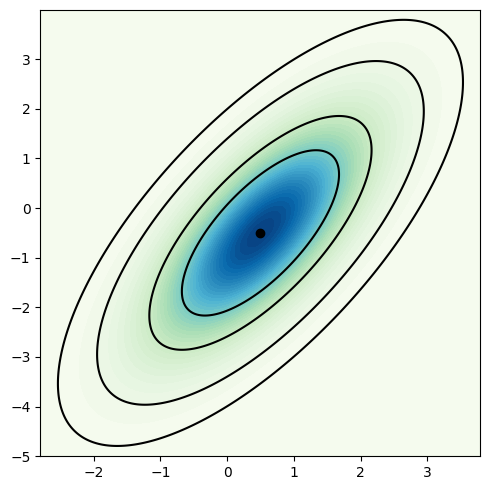

In [69]:
mean = [0.5, -0.5]
cov = [[1, 1], [1, 2]]
probability = [.5, .75, .95, .99]
def probLevel(p):
    D = 1
    return (1 - p) / (2 * math.pi * D)
levels = [probLevel(p) for p in probability]

fig, ax = plt.subplots(figsize=(5, 5))

x, y = np.mgrid[-2.8:3.8:.01, -5:4:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal(mean, cov)


CS = ax.contourf(x, y, rv.pdf(pos), cmap=cm.GnBu, levels=50)
ax.contour(CS, levels=levels, colors=['black'])
ax.plot(*mean, color='black', marker='o')


plt.tight_layout()
plt.show()

In [70]:
df = sp500_px.loc[sp500_px.index >= '2011-01-01', ['XOM', 'CVX']]
mclust = GaussianMixture(n_components=2).fit(df)
print(mclust.bic(df))

4589.3203170532615


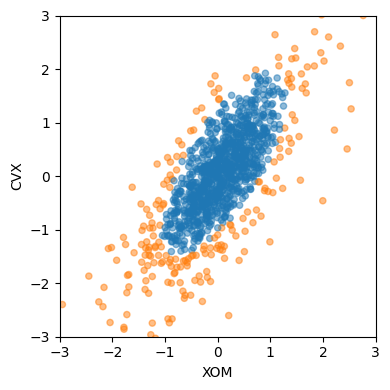

In [71]:
fig, ax = plt.subplots(figsize=(4, 4))
colors = [f'C{c}' for c in mclust.predict(df)]
df.plot.scatter(x='XOM', y='CVX', c=colors, alpha=0.5, ax=ax)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

plt.tight_layout()
plt.show()

In [72]:
print('Mean')
print(mclust.means_)
print('Covariances')
print(mclust.covariances_)

Mean
[[ 0.0709161   0.10228006]
 [-0.05074943 -0.21539465]]
Covariances
[[[0.27074158 0.27800893]
  [0.27800893 0.5212865 ]]

 [[0.98668327 0.99350046]
  [0.99350046 1.69695919]]]


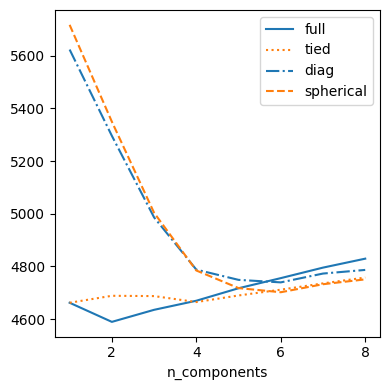

In [73]:
results = []
covariance_types = ['full', 'tied', 'diag', 'spherical']
for n_components in range(1, 9):
    for covariance_type in covariance_types:
        mclust = GaussianMixture(n_components = n_components, warm_start=True,
                                 covariance_type = covariance_type)
        mclust.fit(df)
        results.append({
            'bic': mclust.bic(df),
            'n_components': n_components,
            'covariance_type': covariance_type,
        })

results = pd.DataFrame(results)

colors = ['C0', 'C1', 'C2', 'C3']
styles = ['C0-','C1:','C0-.', 'C1--']

fig, ax = plt.subplots(figsize=(4, 4))
for i, covariance_type in enumerate(covariance_types):
    subset = results.loc[results.covariance_type == covariance_type, :]
    subset.plot(x='n_components', y='bic', ax=ax, label=covariance_type,
                kind='line', style=styles[i]) # , color=colors[i])

plt.tight_layout()
plt.show()

In [74]:
loan_data['outcome'] = pd.Categorical(loan_data['outcome'],
                                      categories=['paid off', 'default'],
                                      ordered=True)
defaults = loan_data.loc[loan_data['outcome'] == 'default',]

columns = ['loan_amnt', 'annual_inc', 'revol_bal', 'open_acc',
           'dti', 'revol_util']

df = defaults[columns]
kmeans = KMeans(n_clusters=4, random_state=1, n_init='auto').fit(df)
counts = Counter(kmeans.labels_)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=columns)
centers['size'] = [counts[i] for i in range(4)]
print(centers)

      loan_amnt     annual_inc     revol_bal   open_acc        dti  \
0  10274.160906   41241.205530   9950.095008   9.480338  17.718588   
1  21444.318867  148736.057263  33152.689572  12.376733  13.831145   
2  24290.909091  409746.465909  84710.988636  13.431818   8.148636   
3  17809.760881   78669.452556  18933.405997  11.594003  17.016428   

   revol_util   size  
0   57.903425  13023  
1   63.151084   1654  
2   60.015647     88  
3   62.183810   7906  


In [75]:
scaler = preprocessing.StandardScaler()
df0 = scaler.fit_transform(df * 1.0)

kmeans = KMeans(n_clusters=4, random_state=1, n_init='auto').fit(df0)
counts = Counter(kmeans.labels_)

centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_),
                       columns=columns)
centers['size'] = [counts[i] for i in range(4)]
print(centers)

      loan_amnt     annual_inc     revol_bal   open_acc        dti  \
0  10506.814810   51114.024278  11634.707310   7.509576  15.933778   
1  10323.453512   53466.038196   6052.642631   8.664617  11.309106   
2  25950.205142  116834.142232  32945.972921  12.396335  16.165914   
3  13486.397177   55905.907924  16435.679660  14.322746  24.210014   

   revol_util  size  
0   77.784329  7399  
1   30.990055  5357  
2   66.123542  3671  
3   59.462324  6244  


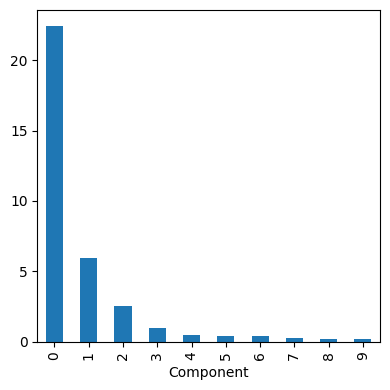

In [76]:
syms = ['GOOGL', 'AMZN', 'AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM',
        'SLB', 'COP', 'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST']
top_sp1 = sp500_px.loc[sp500_px.index >= '2005-01-01', syms]

sp_pca1 = PCA()
sp_pca1.fit(top_sp1)

explained_variance = pd.DataFrame(sp_pca1.explained_variance_)
ax = explained_variance.head(10).plot.bar(legend=False, figsize=(4, 4))
ax.set_xlabel('Component')

plt.tight_layout()
plt.show()

In [77]:
loadings = pd.DataFrame(sp_pca1.components_[0:2, :],
                        columns=top_sp1.columns)
print(loadings.transpose())

              0         1
GOOGL -0.857310  0.477873
AMZN  -0.444728 -0.874149
AAPL  -0.071627 -0.020802
MSFT  -0.036002 -0.006204
CSCO  -0.029205 -0.003045
INTC  -0.026666 -0.006069
CVX   -0.089548 -0.037420
XOM   -0.080336 -0.020511
SLB   -0.110218 -0.030356
COP   -0.057739 -0.024117
JPM   -0.071228 -0.009244
WFC   -0.053228 -0.008597
USB   -0.041670 -0.005952
AXP   -0.078907 -0.024027
WMT   -0.040346 -0.007141
TGT   -0.063659 -0.024662
HD    -0.051412 -0.032922
COST  -0.071403 -0.033826


In [78]:
x = defaults[['dti', 'payment_inc_ratio', 'home_', 'purpose_']].loc[0:4, :]
print(x)

     dti  payment_inc_ratio home_            purpose_
0   1.00            2.39320  RENT      major_purchase
1   5.55            4.57170   OWN      small_business
2  18.08            9.71600  RENT               other
3  10.08           12.21520  RENT  debt_consolidation
4   7.06            3.90888  RENT               other


In [79]:
columns = ['dti', 'payment_inc_ratio', 'home_', 'pub_rec_zero']
df = pd.get_dummies(defaults[columns])

scaler = preprocessing.StandardScaler()

df0 = scaler.fit_transform(df * 1.0)
kmeans = KMeans(n_clusters=4, random_state=1, n_init='auto').fit(df0)
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_),
                       columns=df.columns)
print(centers)

         dti  payment_inc_ratio  pub_rec_zero  home__MORTGAGE     home__OWN  \
0  16.977575           9.055062      0.921301   -1.038059e-14 -3.275158e-15   
1  17.197993           9.266666      0.917903    7.438494e-15  1.000000e+00   
2  21.796605          11.058379      0.975886    1.000000e+00  2.692291e-15   
3  13.097357           5.778804      0.838922    1.000000e+00  3.219647e-15   

     home__RENT  
0  1.000000e+00  
1 -5.273559e-15  
2  1.054712e-14  
3  7.105427e-15  
